# Customer Lifetime Value Predictions


This project leverages machine learning algorithms to predict Customer Lifetime Value (CLV), a key metric in the insurance industry. Accurately predicting CLV enables insurance companies to optimize marketing strategies, retain high-value customers, and improve customer acquisition efforts

## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
vehicle_insurance_data = pd.read_csv('VehicleInsuranceData.csv')

In [3]:
# Preview data head
vehicle_insurance_data.head()

,Unnamed: 0,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,1,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,2,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,3,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,4,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,5,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
# View dataset info
vehicle_insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8630 entries, 0 to 8629
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     8630 non-null   int64  
 1   clv                            8630 non-null   float64
 2   Response                       8630 non-null   object 
 3   Coverage                       8630 non-null   object 
 4   Education                      8630 non-null   object 
 5   EmploymentStatus               8630 non-null   object 
 6   Gender                         8630 non-null   object 
 7   Income                         8630 non-null   int64  
 8   Location.Code                  8630 non-null   object 
 9   Marital.Status                 8630 non-null   object 
 10  Monthly.Premium.Auto           8630 non-null   int64  
 11  Months.Since.Last.Claim        8630 non-null   int64  
 12  Months.Since.Policy.Inception  8630 non-null   i

In [5]:
# View Data types
vehicle_insurance_data.dtypes

,0
Unnamed: 0,int64
clv,float64
Response,object
Coverage,object
Education,object
EmploymentStatus,object
Gender,object
Income,int64
Location.Code,object
Marital.Status,object


In [6]:
# Check for null values
vehicle_insurance_data.isnull().sum()

,0
Unnamed: 0,0
clv,0
Response,0
Coverage,0
Education,0
EmploymentStatus,0
Gender,0
Income,0
Location.Code,0
Marital.Status,0


In [7]:
# Get value counts for the dataset
for column in vehicle_insurance_data.columns:
    print(f"Value counts for {column}:\n{vehicle_insurance_data[column].value_counts()}\n")

Value counts for Unnamed: 0:
Unnamed: 0
9134    1
1       1
2       1
3       1
4       1
       ..
28      1
29      1
30      1
31      1
32      1
Name: count, Length: 8630, dtype: int64

Value counts for clv:
clv
6521.368813    6
8092.876960    6
3873.647046    6
5169.499370    6
8714.922135    6
              ..
2685.425957    1
4709.522180    1
6686.128629    1
8060.161694    1
3915.798108    1
Name: count, Length: 7602, dtype: int64

Value counts for Response:
Response
No     7400
Yes    1230
Name: count, dtype: int64

Value counts for Coverage:
Coverage
Basic       5314
Extended    2563
Premium      753
Name: count, dtype: int64

Value counts for Education:
Education
Bachelor                2592
College                 2549
High School or Below    2465
Master                   700
Doctor                   324
Name: count, dtype: int64

Value counts for EmploymentStatus:
EmploymentStatus
Employed         5366
Unemployed       2212
Medical Leave     407
Disabled          381
Reti

In [8]:
# Describe dataset
vehicle_insurance_data.describe()

,Unnamed: 0,clv,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount
count,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000,8630.000000
mean,4560.576825,6725.281515,37586.405794,91.677057,15.084473,48.004287,0.389108,3.020626,427.131607
std,2637.448711,3934.876313,30453.838594,32.648209,10.048979,27.880693,0.920491,2.445994,282.722326
min,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2280.250000,3858.177183,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.881398
50%,4547.500000,5569.220419,33817.000000,81.000000,14.000000,48.000000,0.000000,2.000000,376.880363
75%,6852.750000,8456.408530,62250.750000,108.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,9134.000000,21235.445570,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [9]:
# Get unique values for each column
for column in vehicle_insurance_data.columns:
    unique_values = vehicle_insurance_data[column].unique()
    if len(unique_values) <= 10:
        print(f"Unique values for {column}: {unique_values}\n")
    else:
        print(f"Number of unique values for {column}: more than 10 unique values were found.\n")

Number of unique values for Unnamed: 0: more than 10 unique values were found.

Number of unique values for clv: more than 10 unique values were found.

Unique values for Response: ['No' 'Yes']

Unique values for Coverage: ['Basic' 'Extended' 'Premium']

Unique values for Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']

Unique values for EmploymentStatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

Unique values for Gender: ['F' 'M']

Number of unique values for Income: more than 10 unique values were found.

Unique values for Location.Code: ['Suburban' 'Rural' 'Urban']

Unique values for Marital.Status: ['Married' 'Single' 'Divorced']

Number of unique values for Monthly.Premium.Auto: more than 10 unique values were found.

Number of unique values for Months.Since.Last.Claim: more than 10 unique values were found.

Number of unique values for Months.Since.Policy.Inception: more than 10 unique values were found.

Unique values for Number.o

#### Plot the data

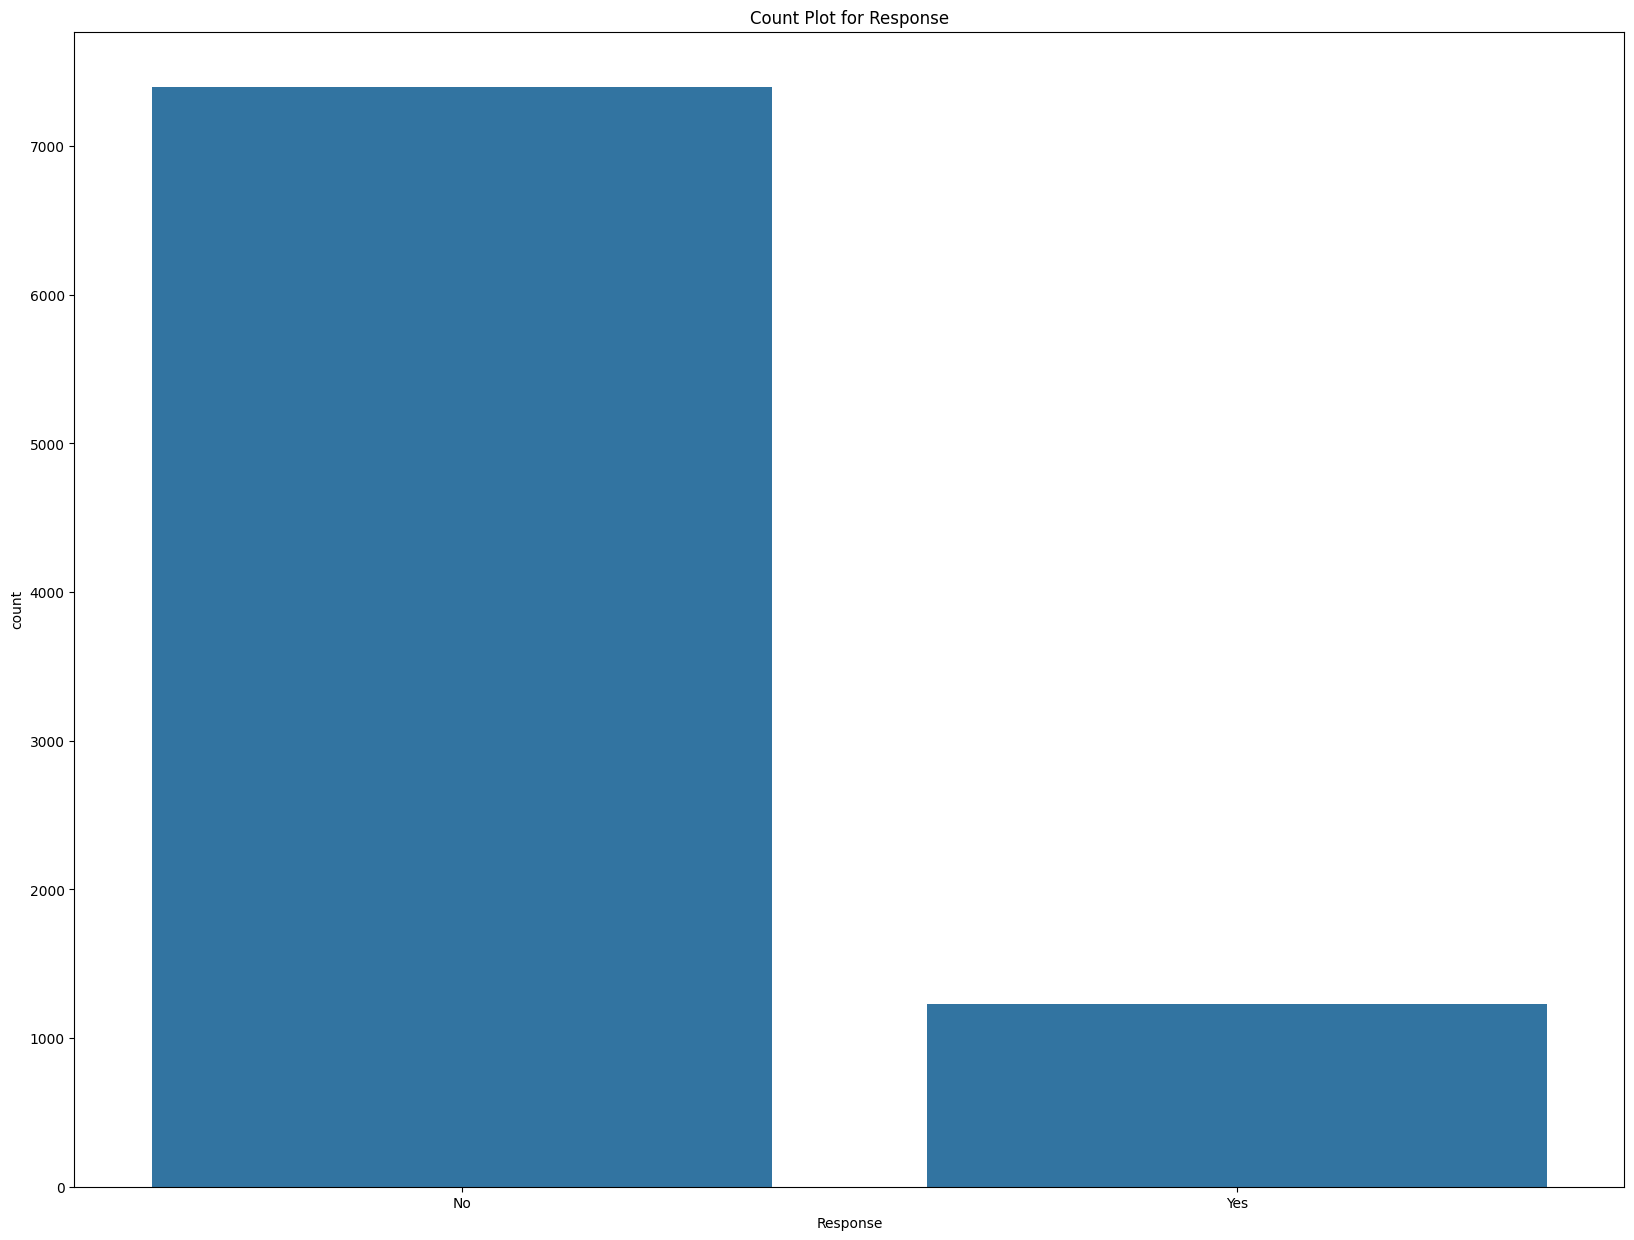

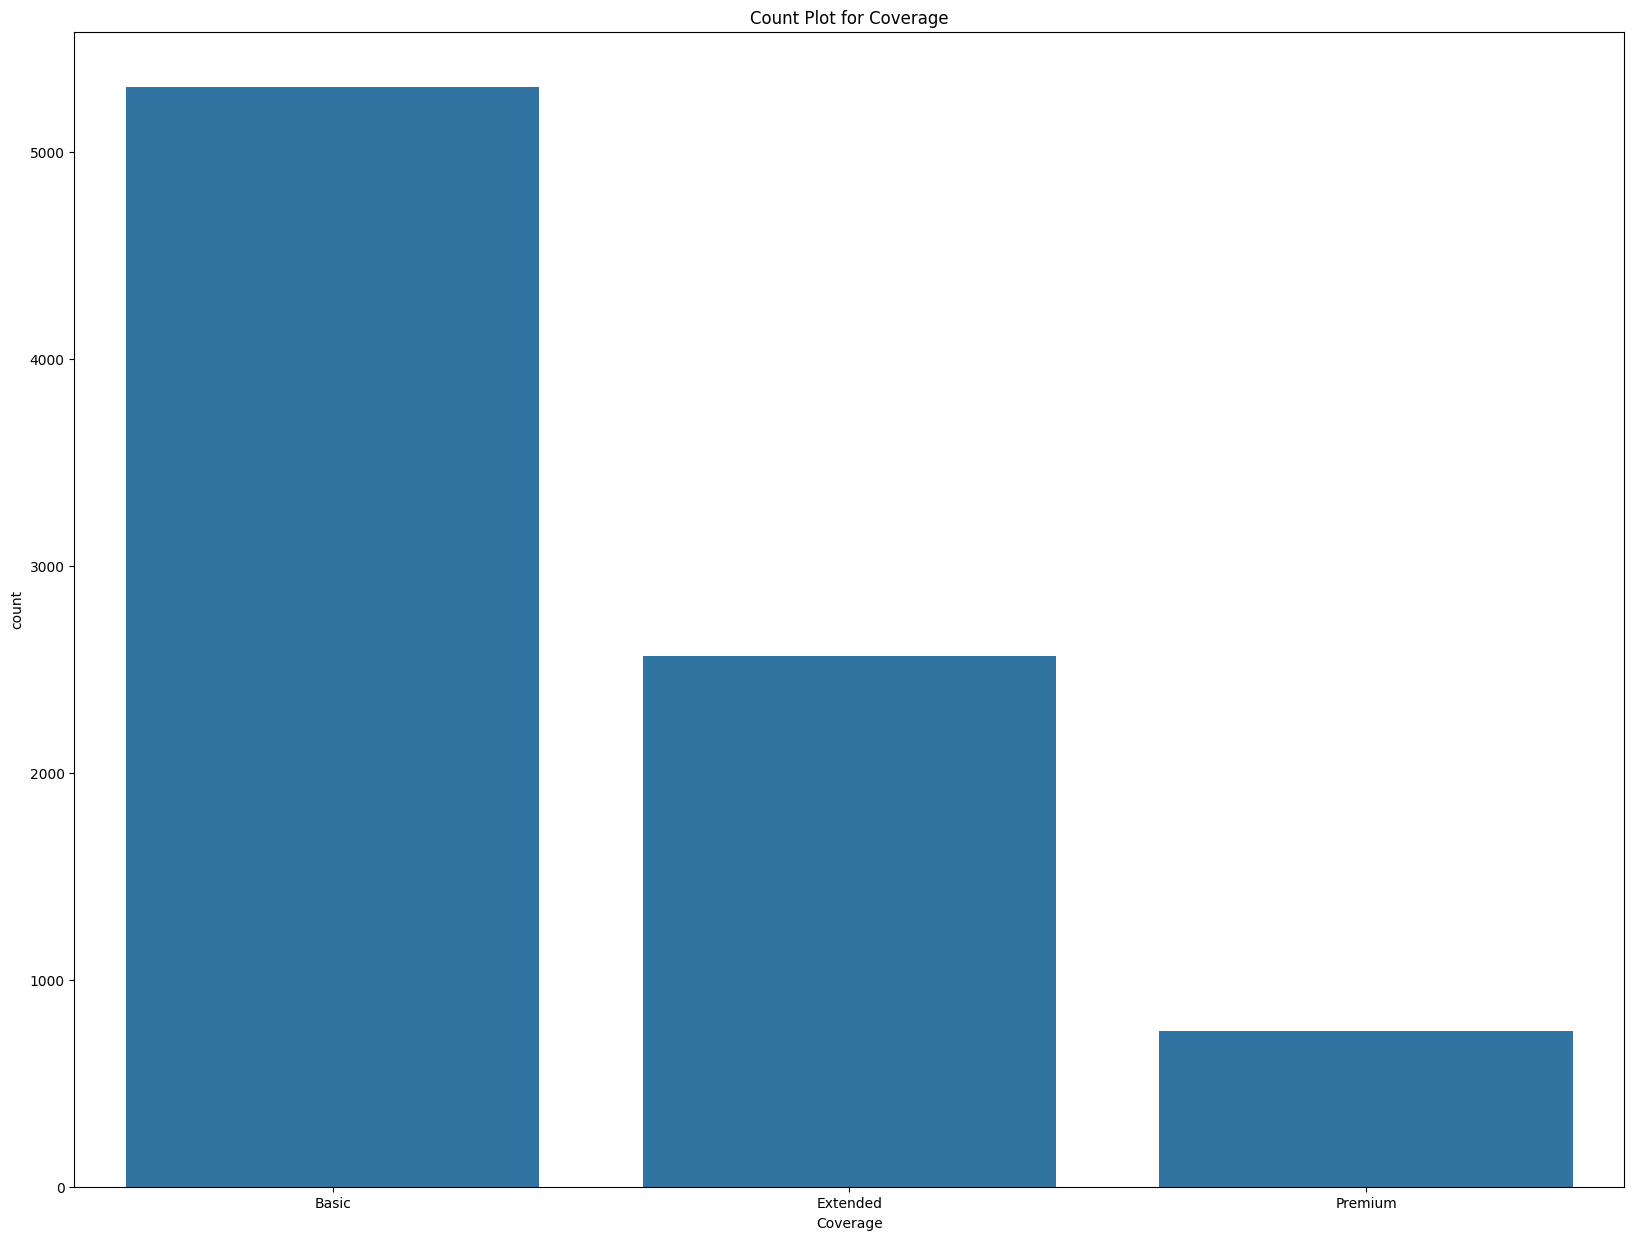

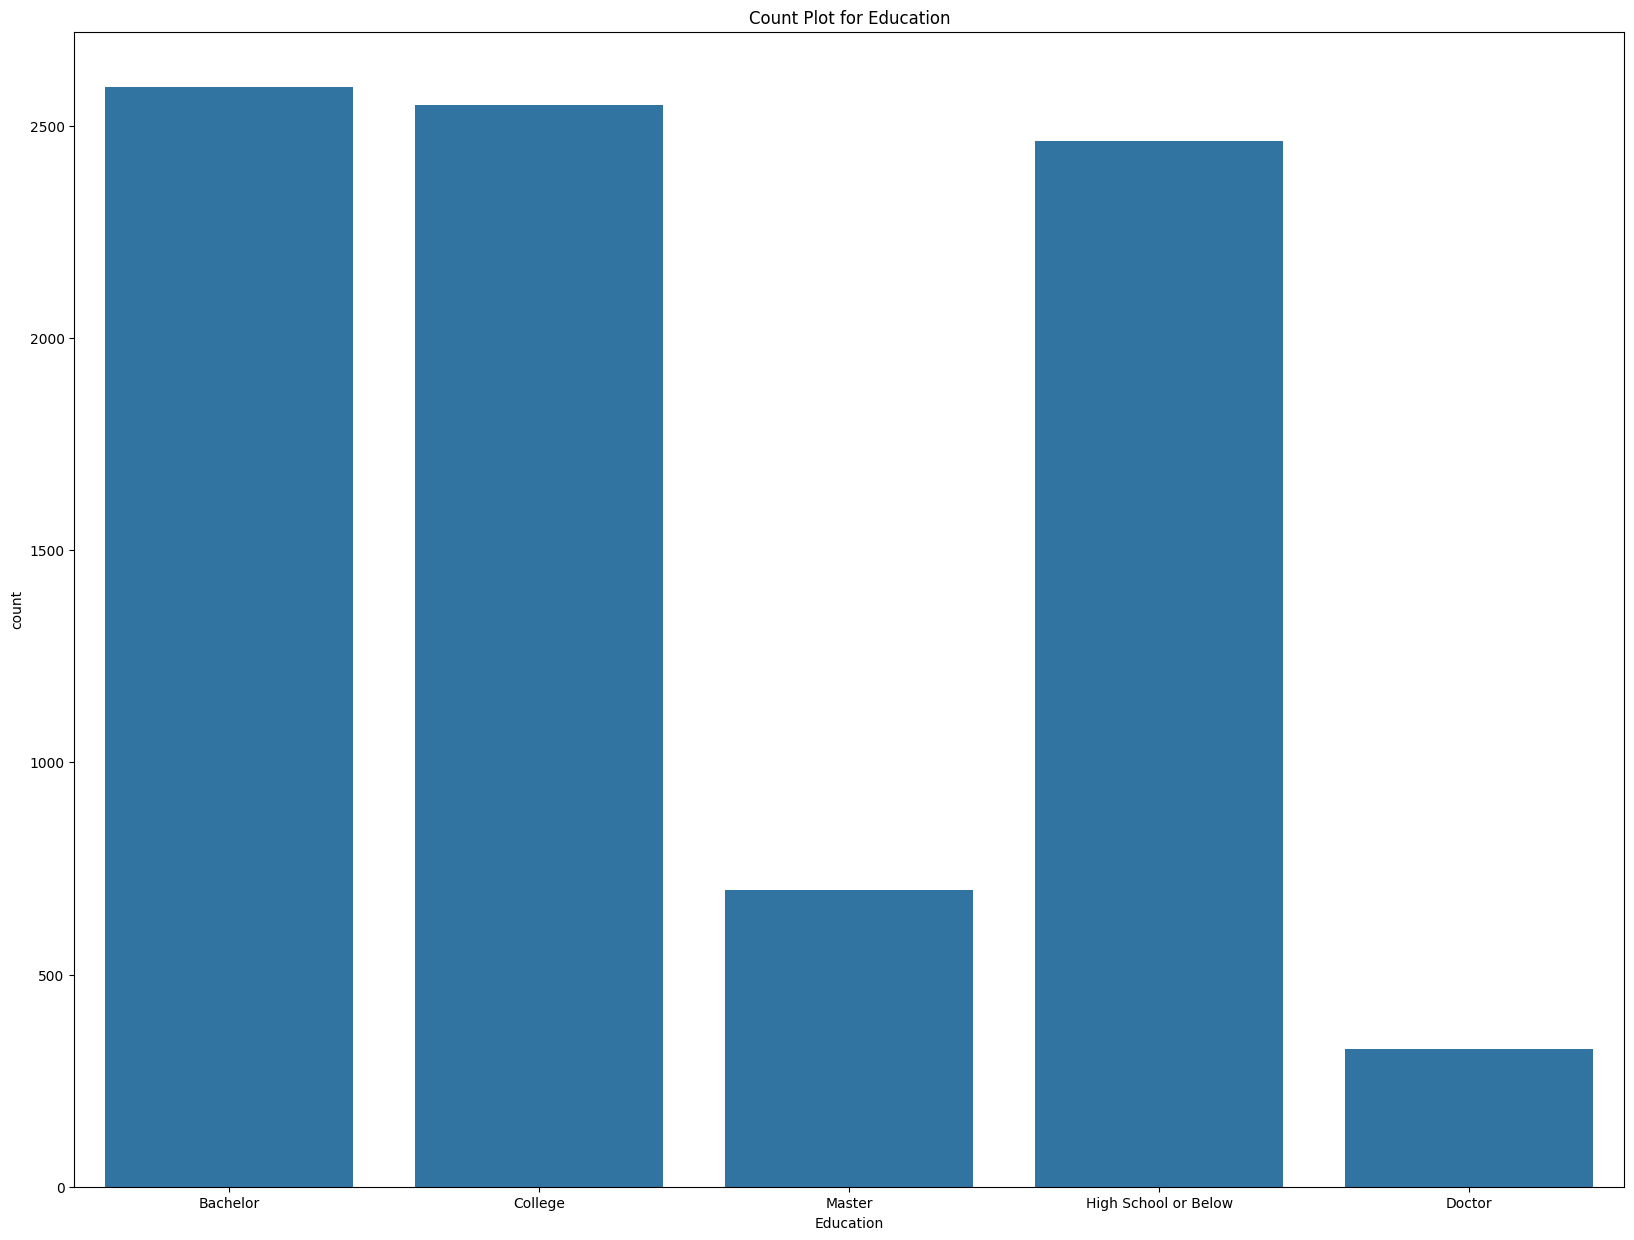

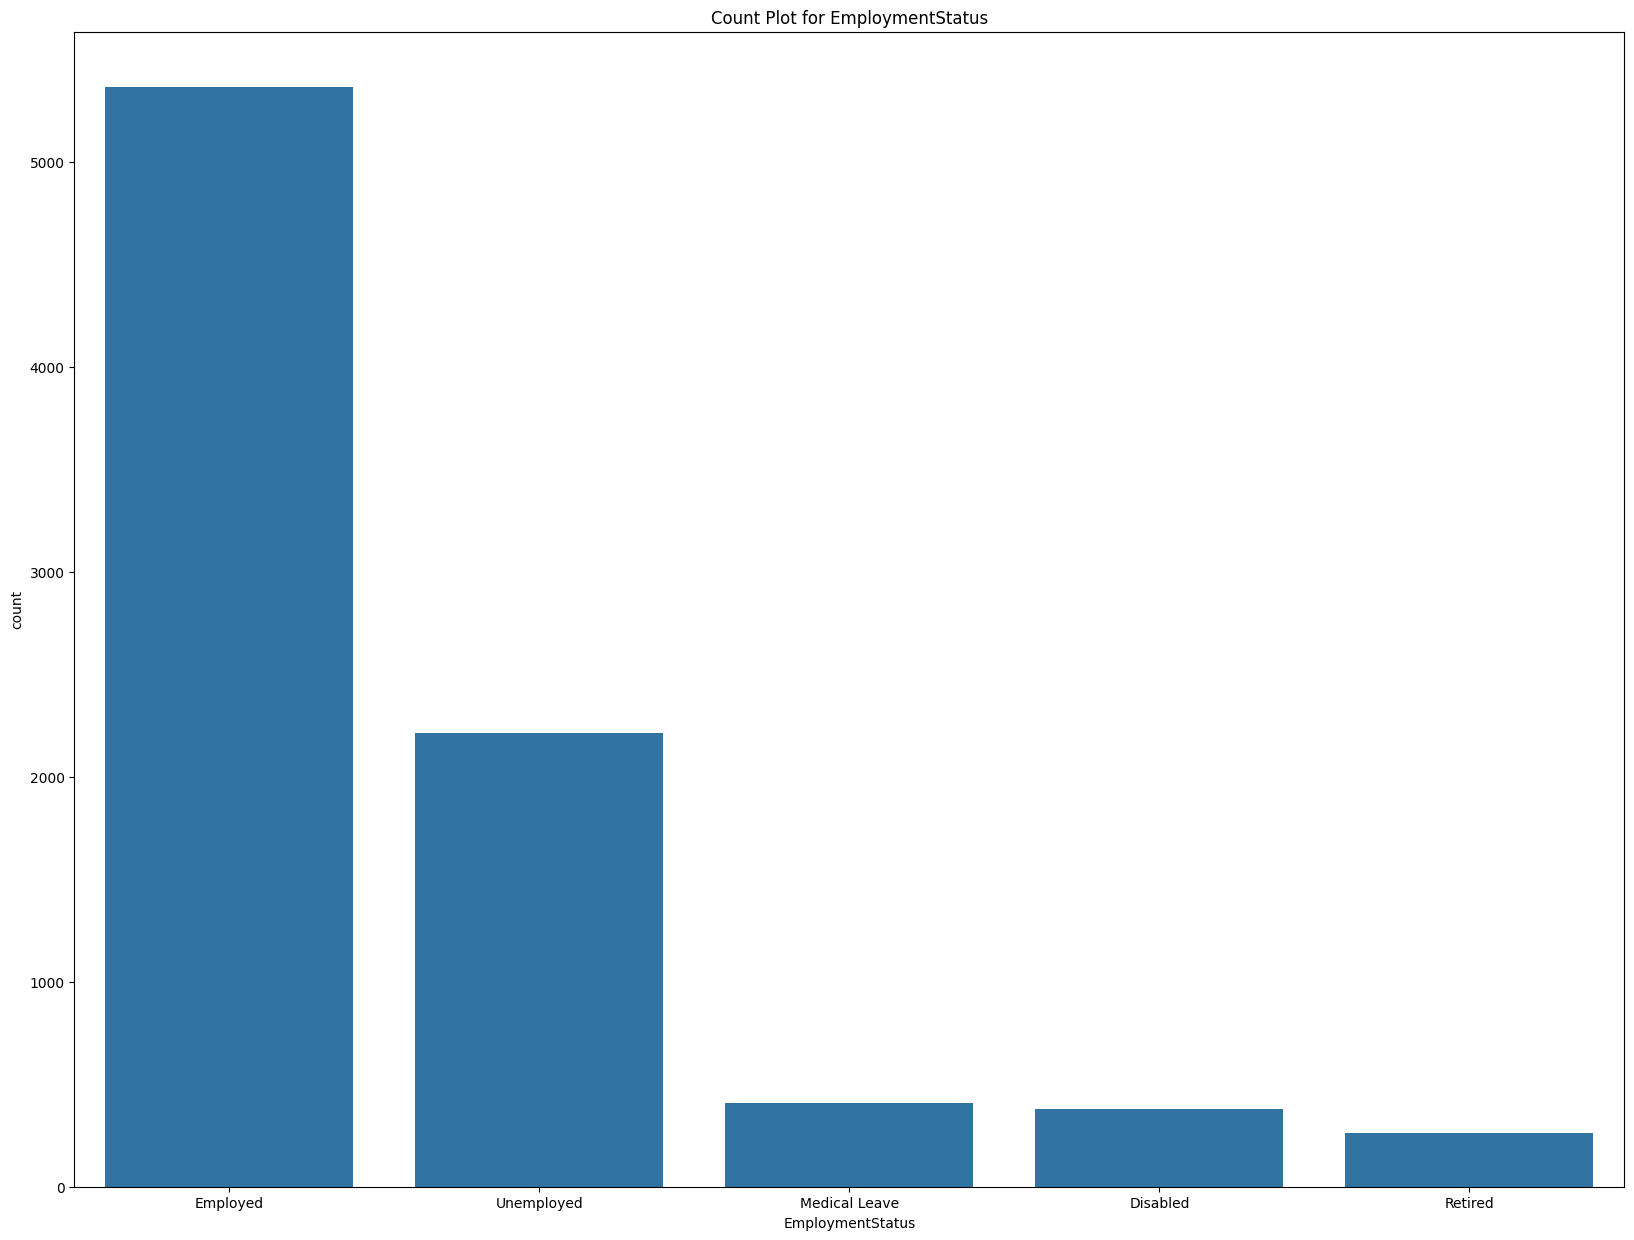

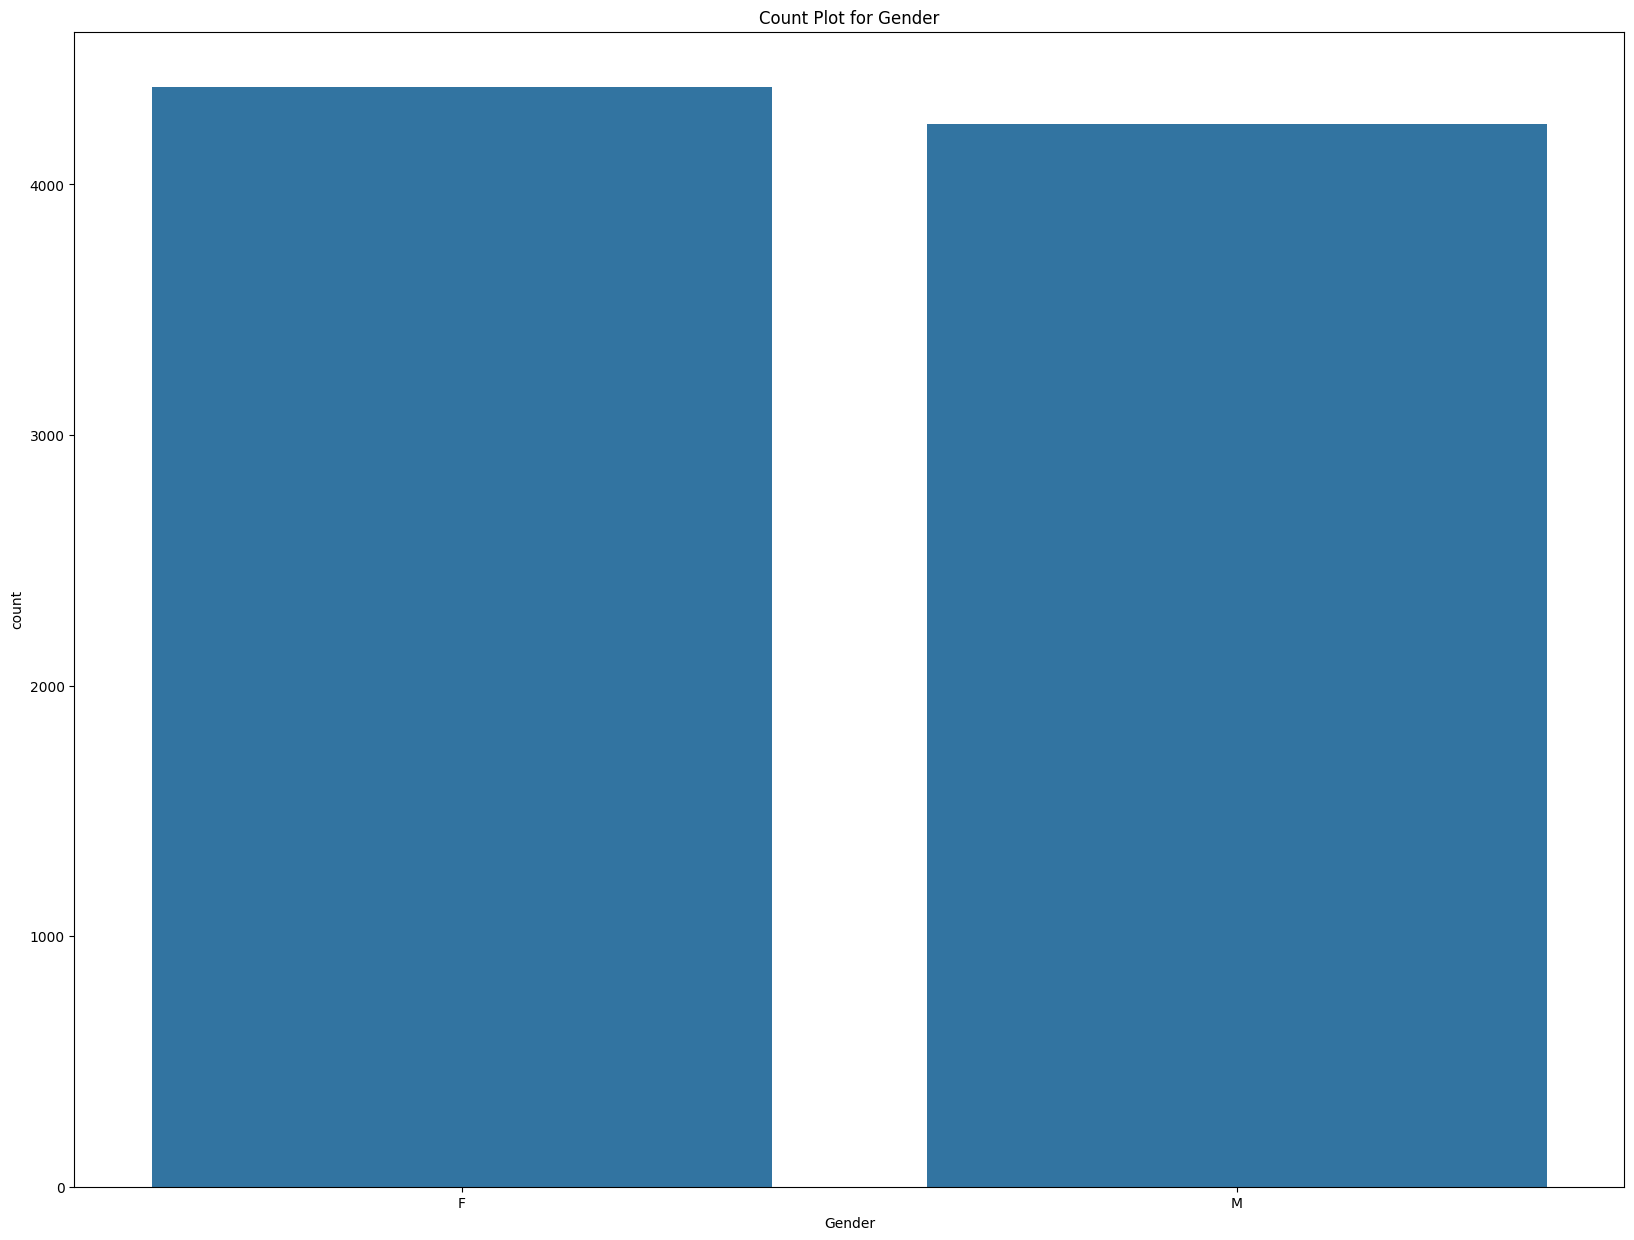

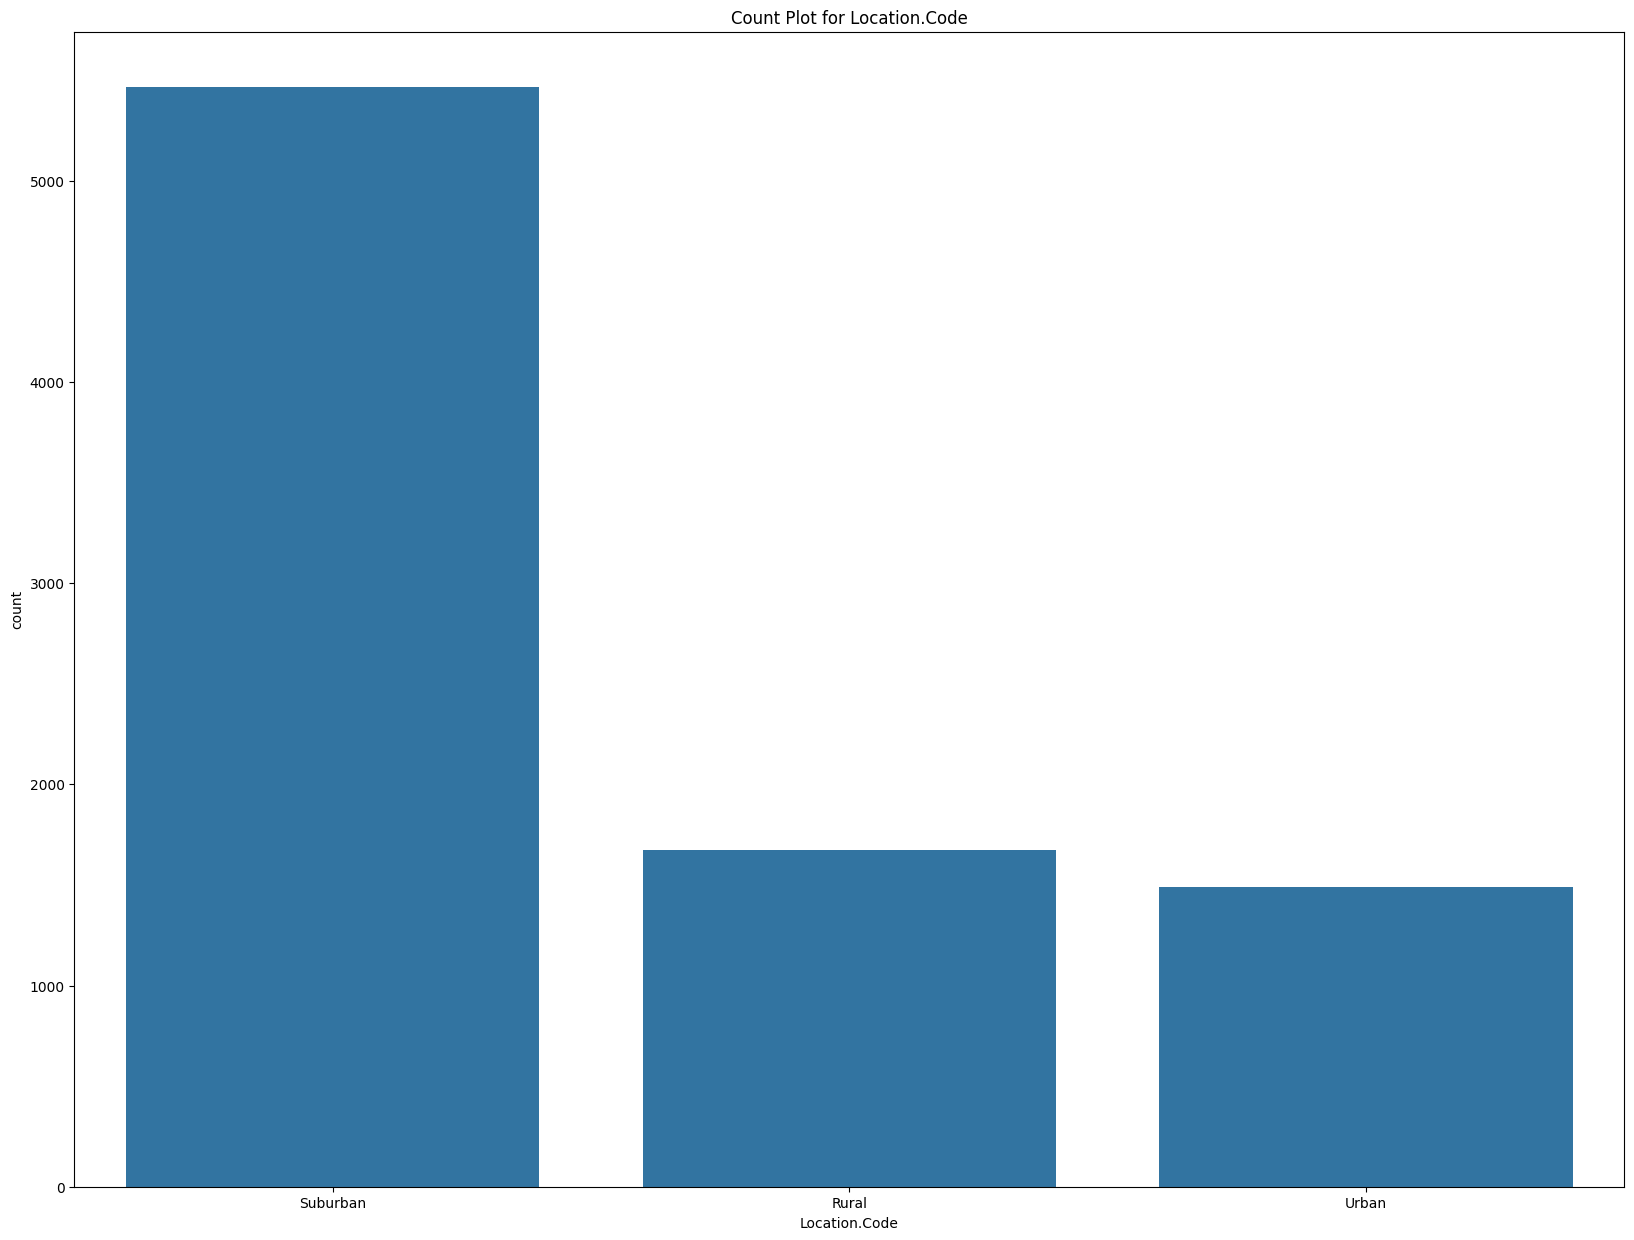

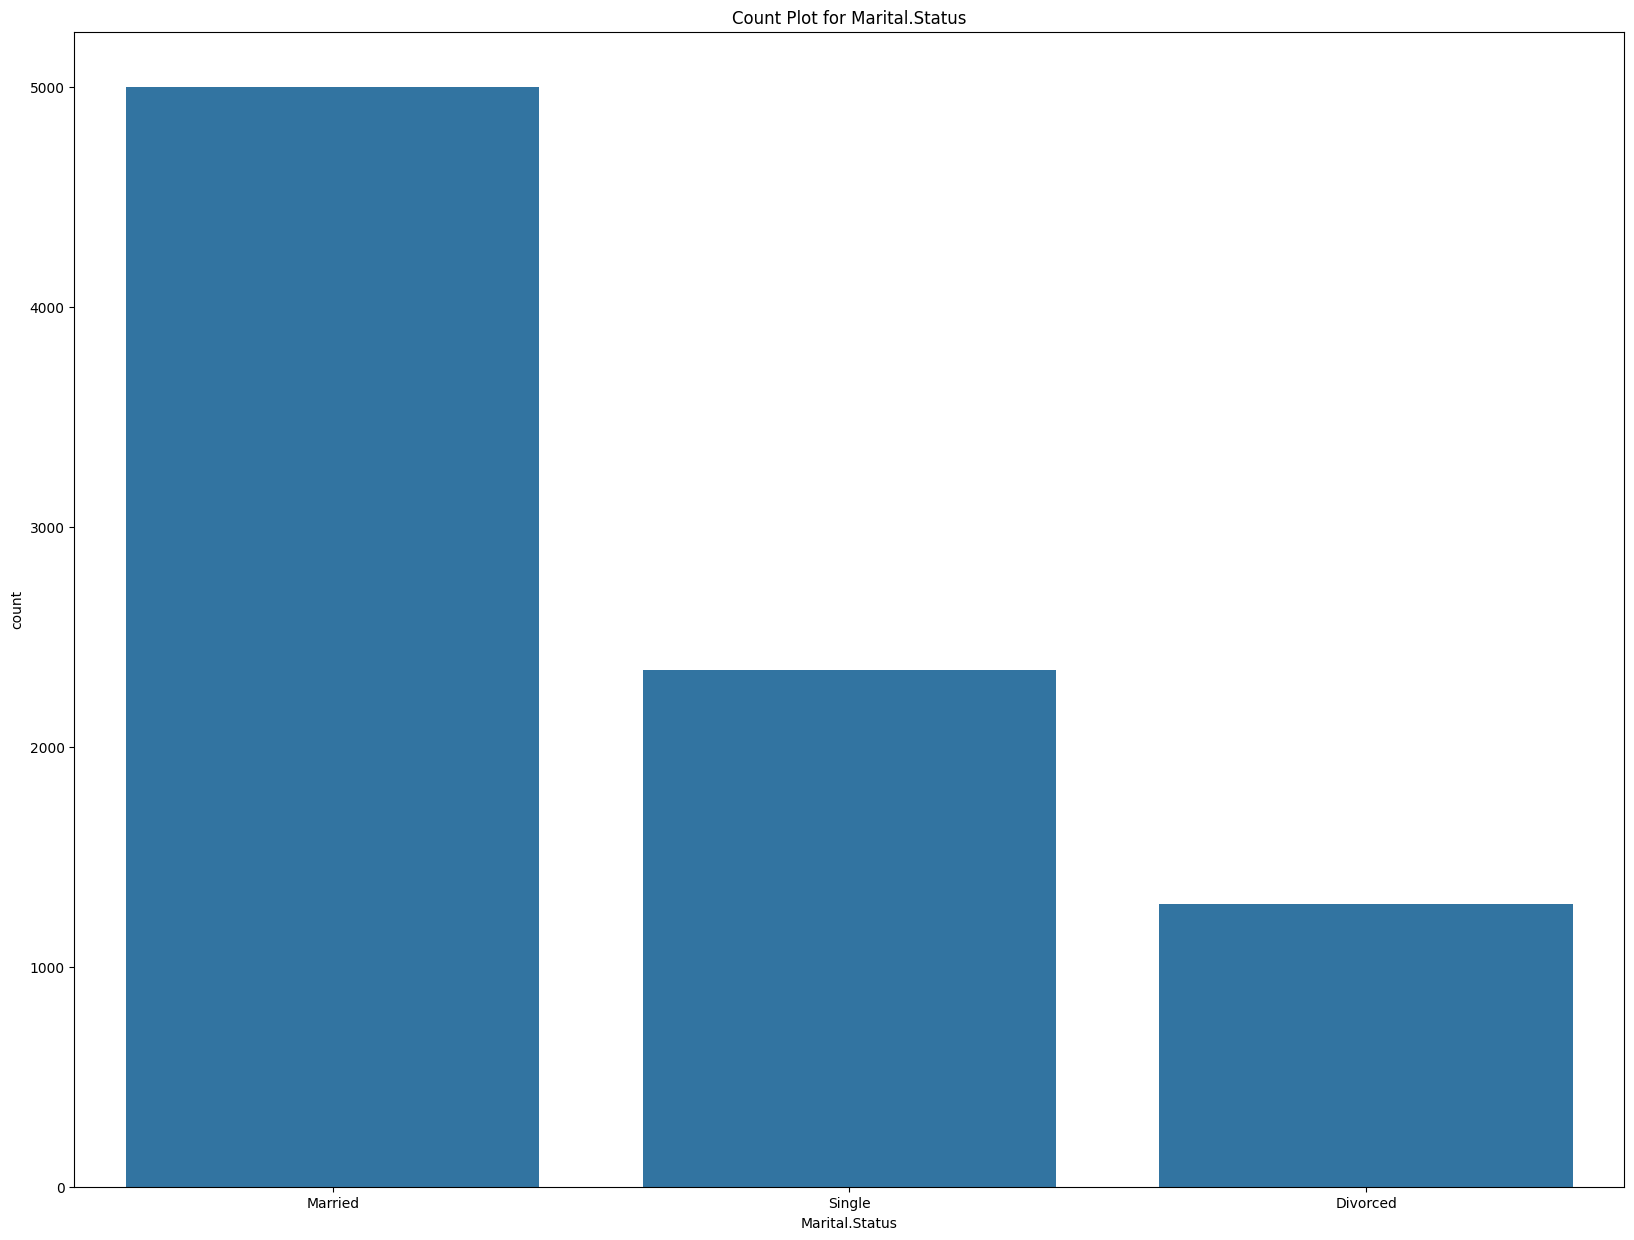

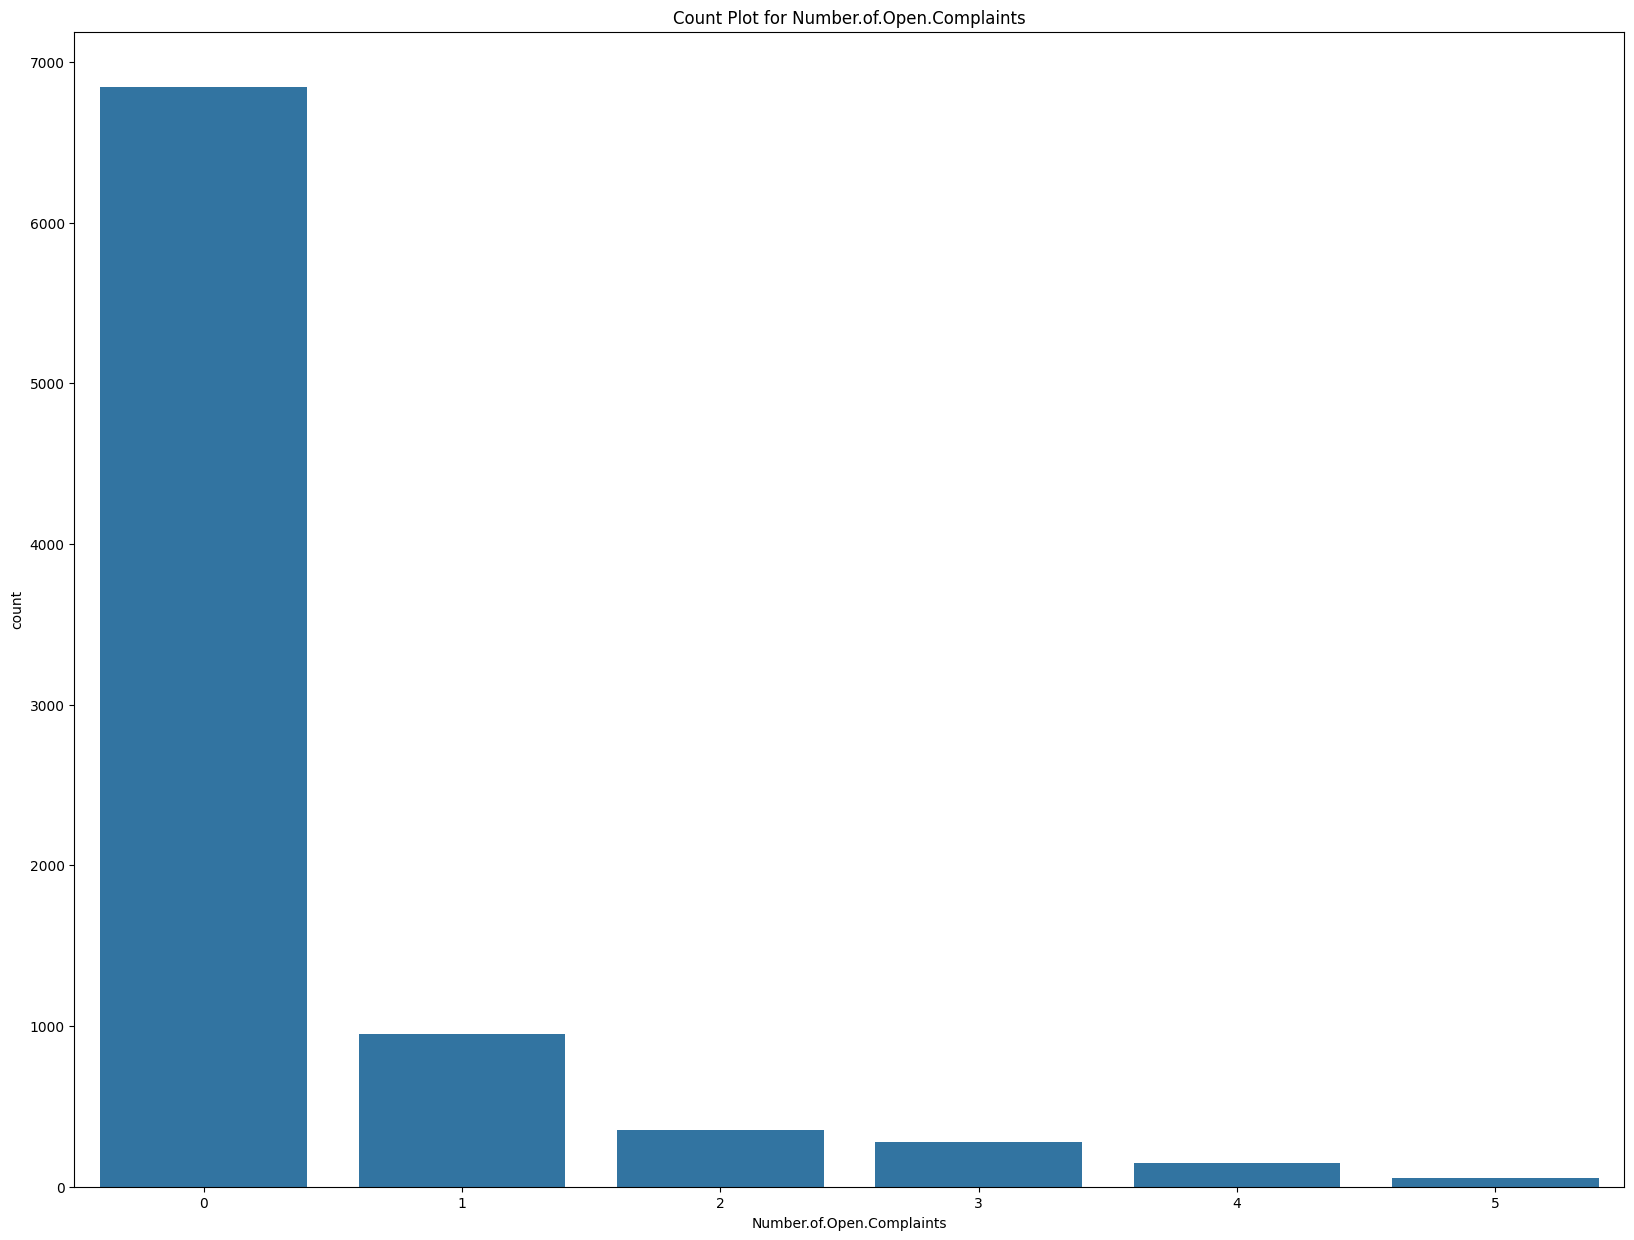

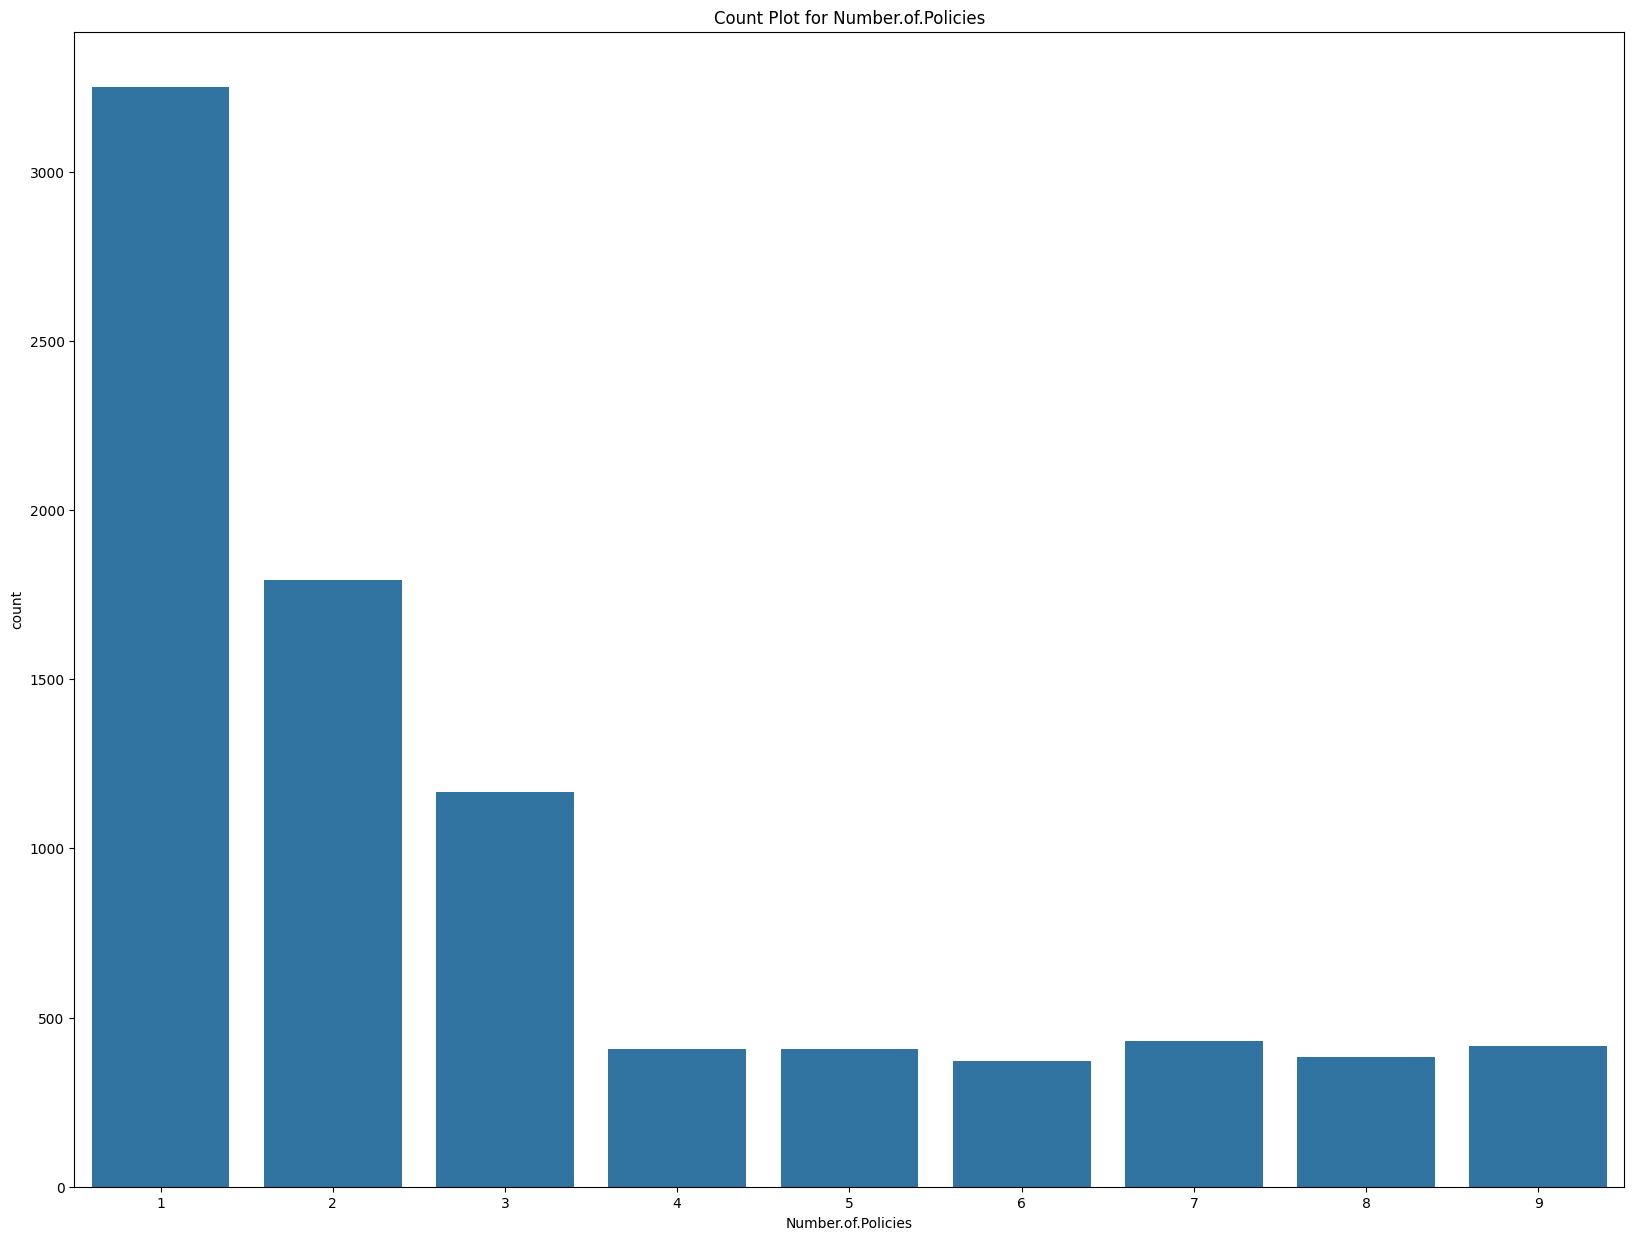

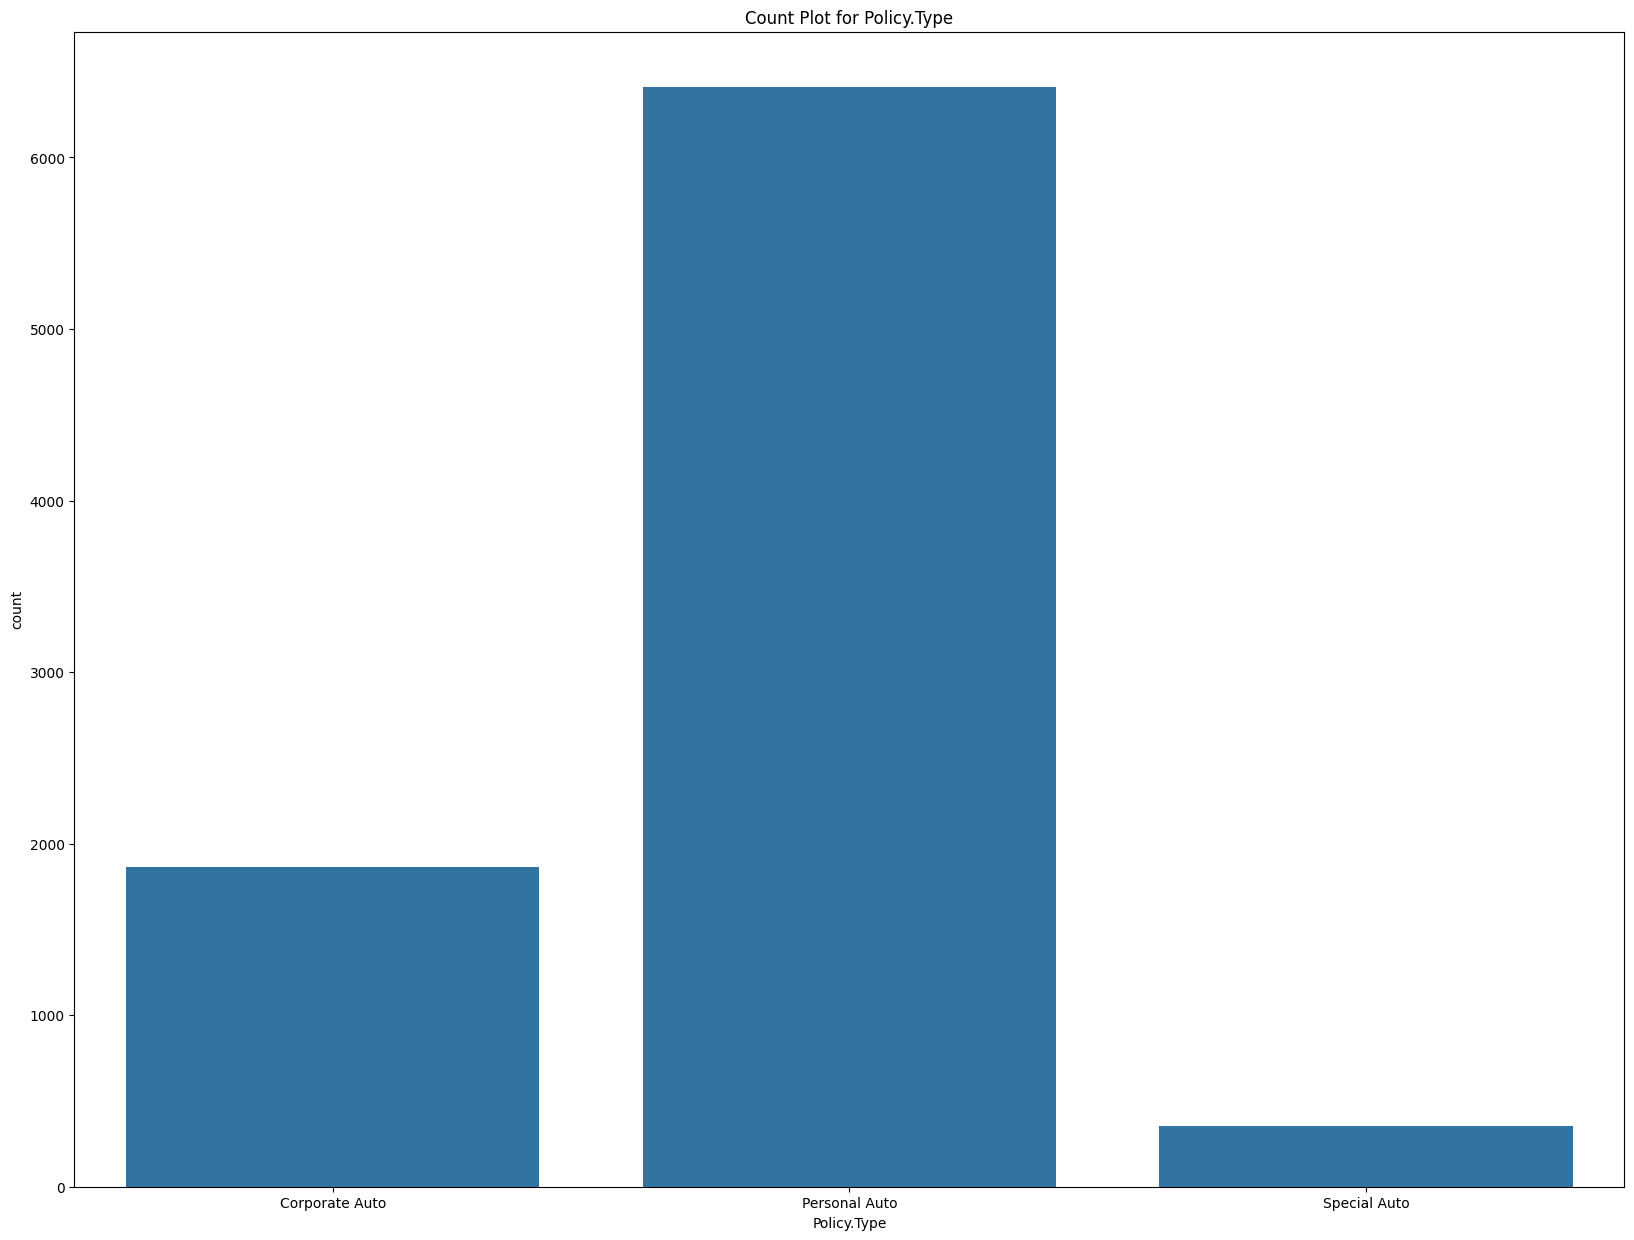

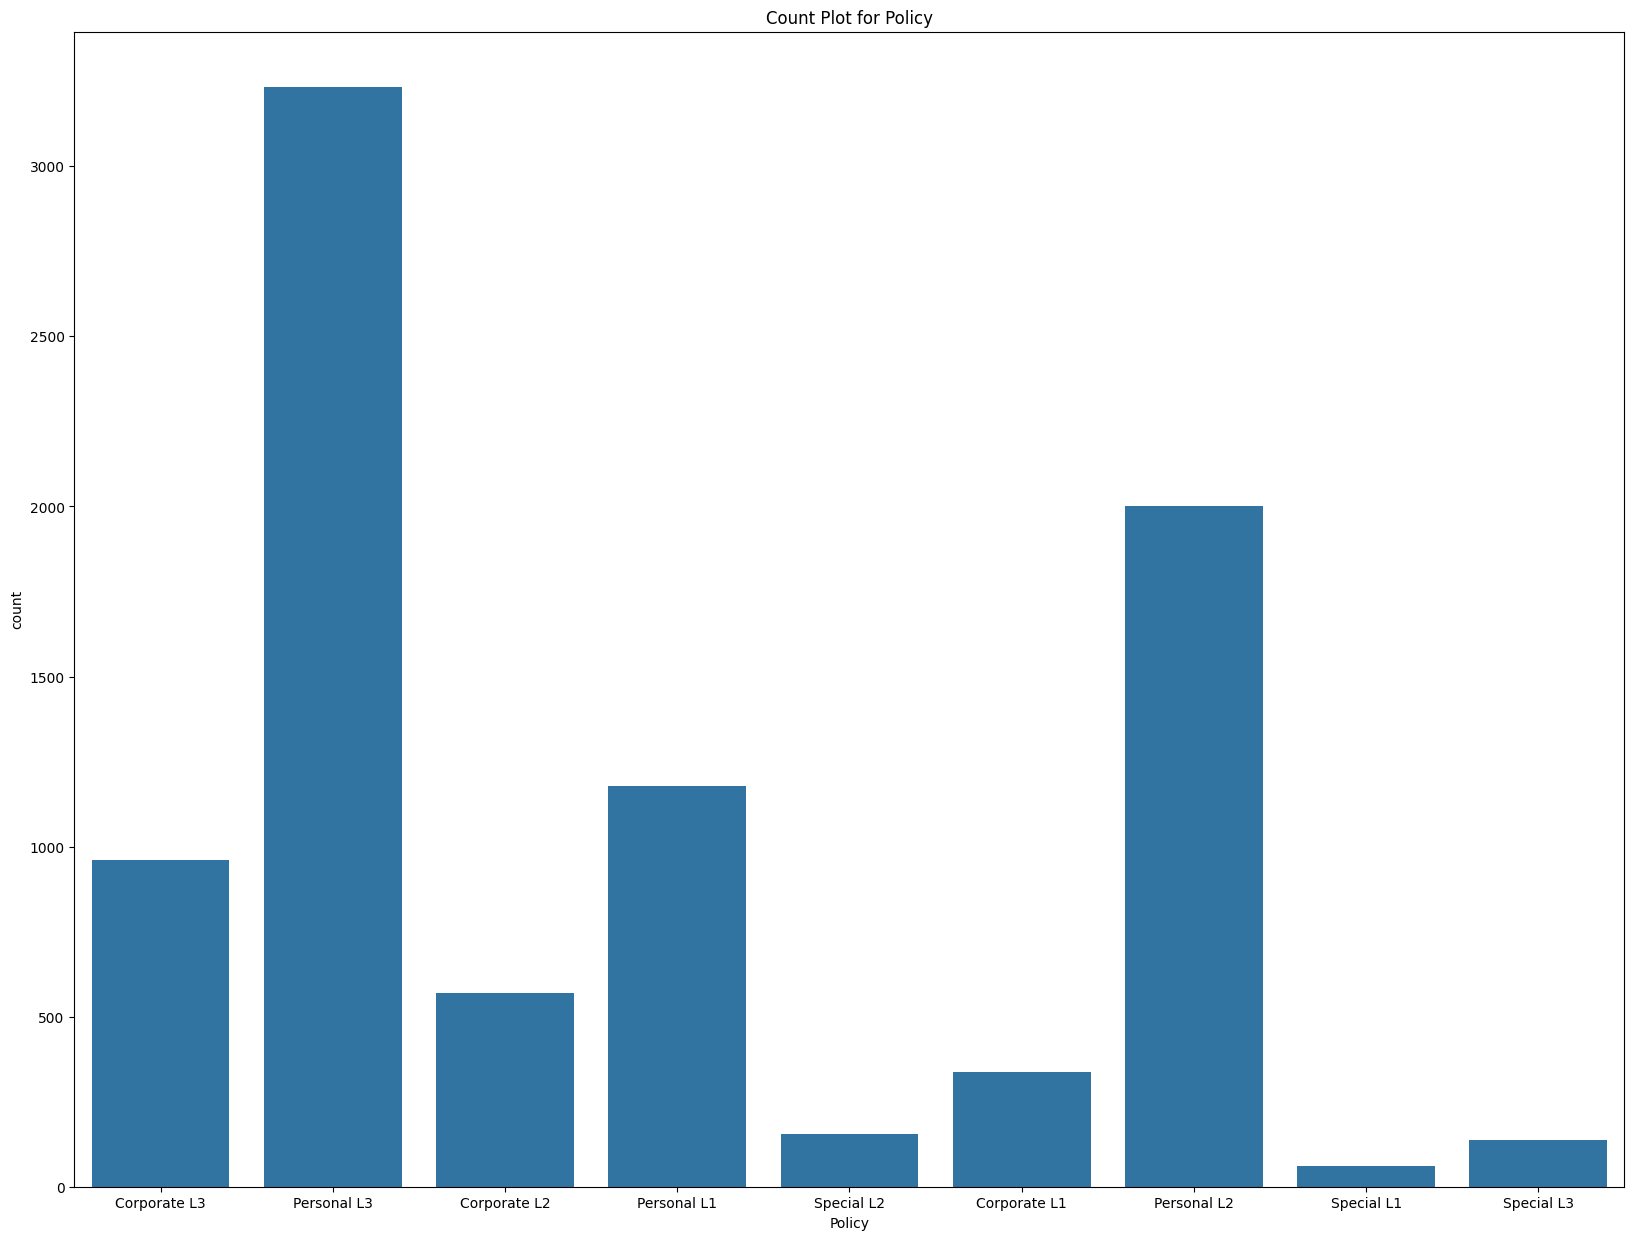

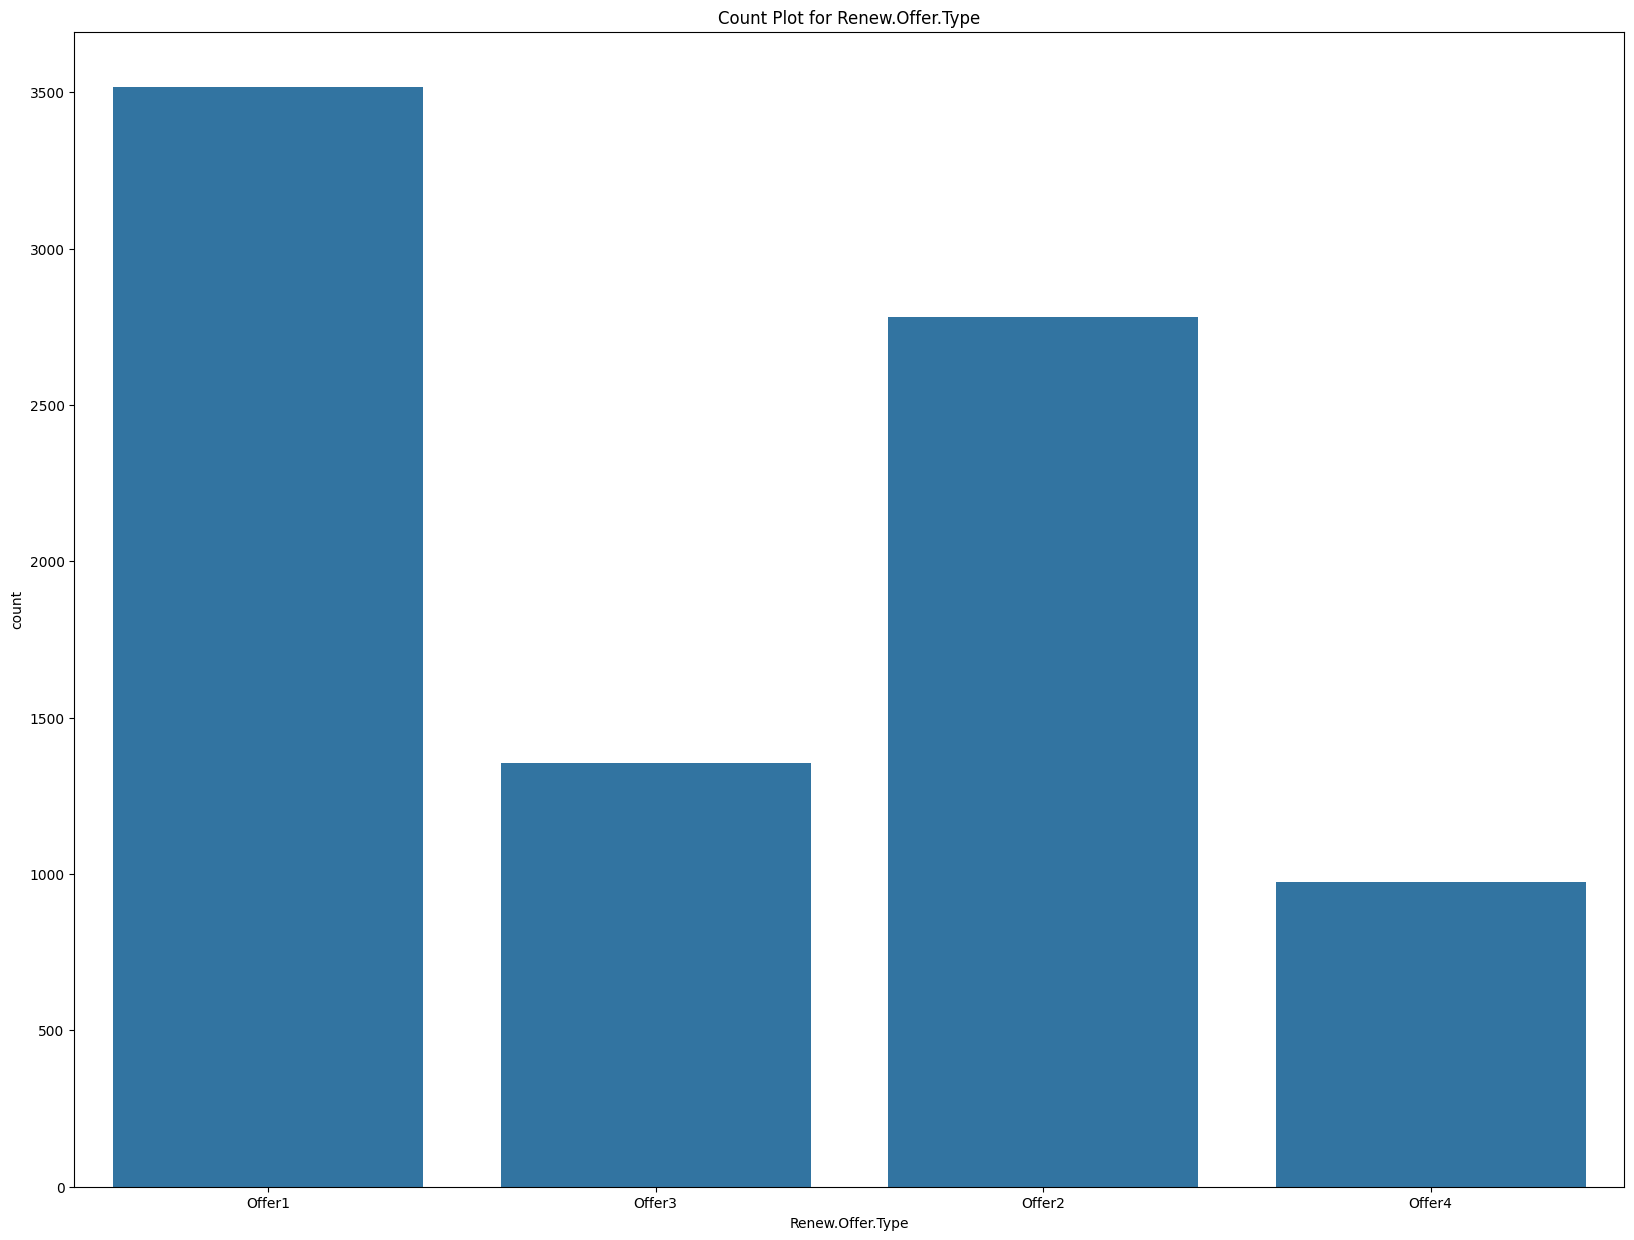

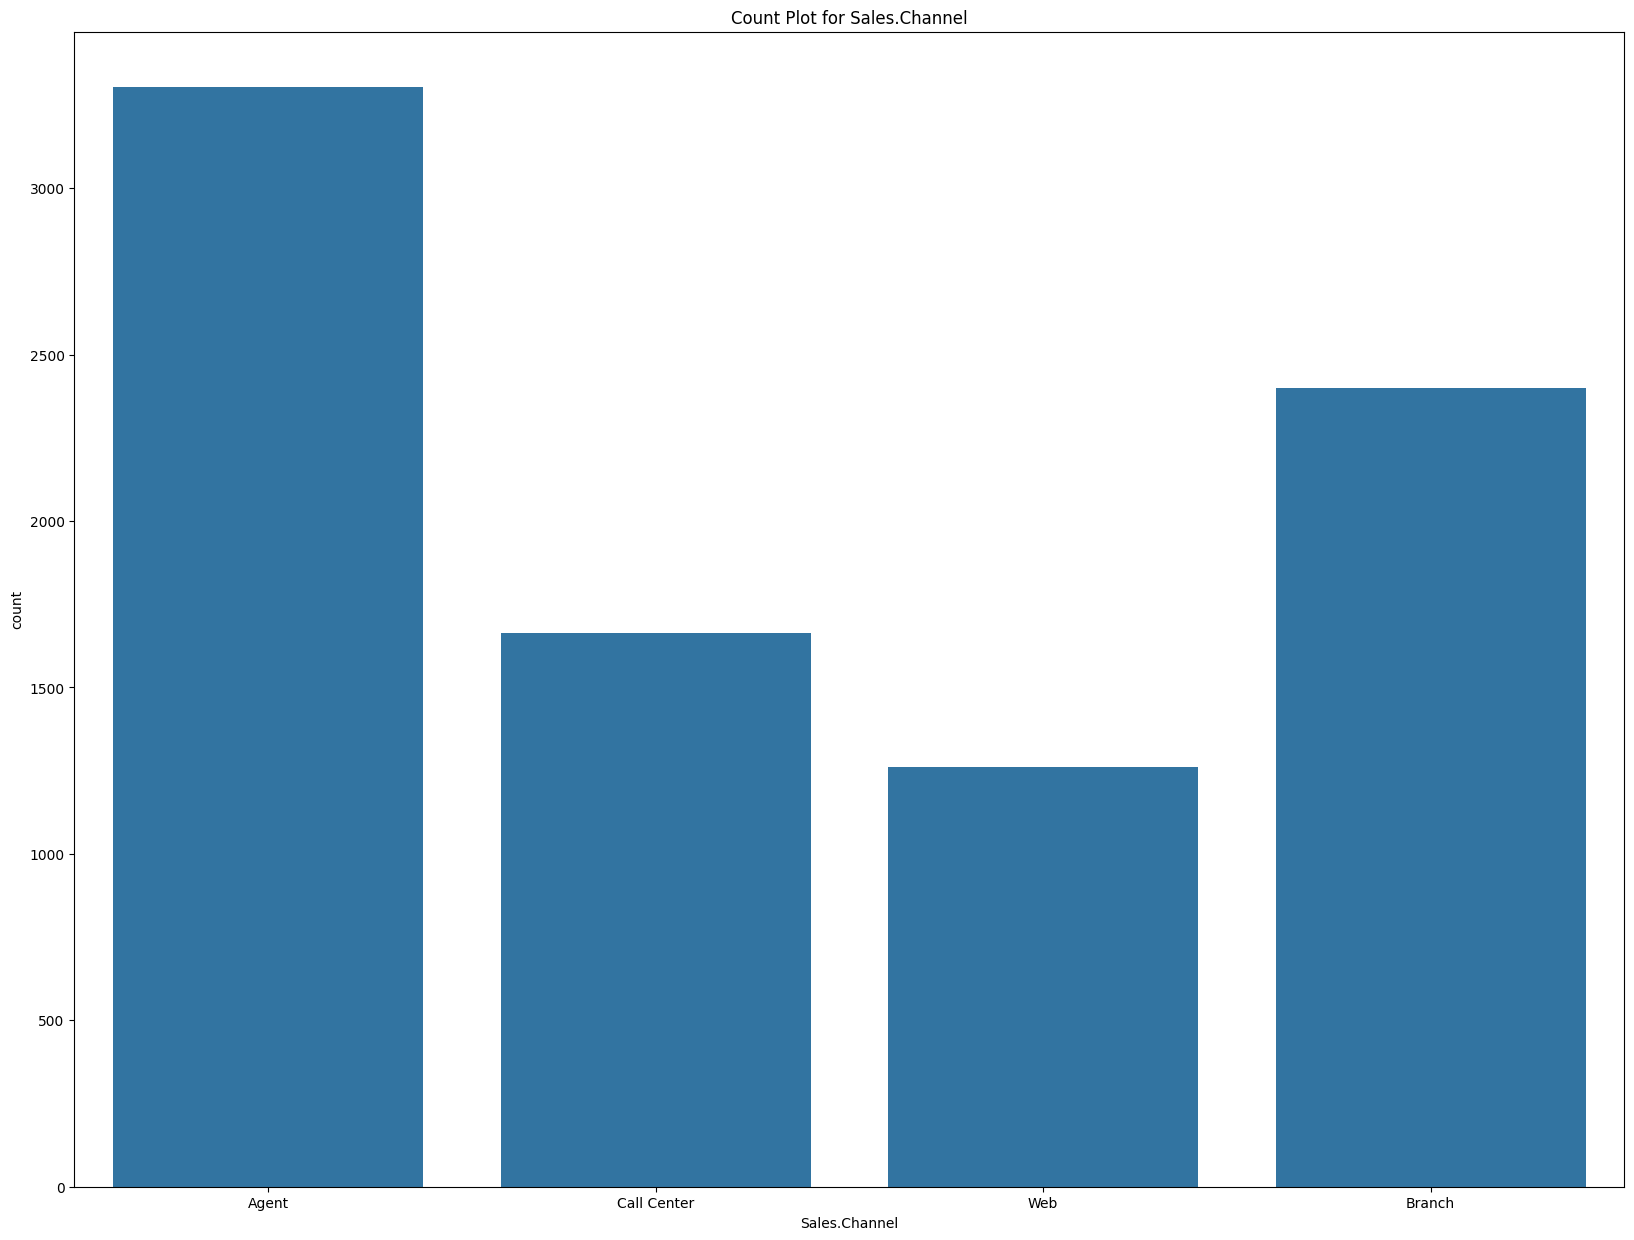

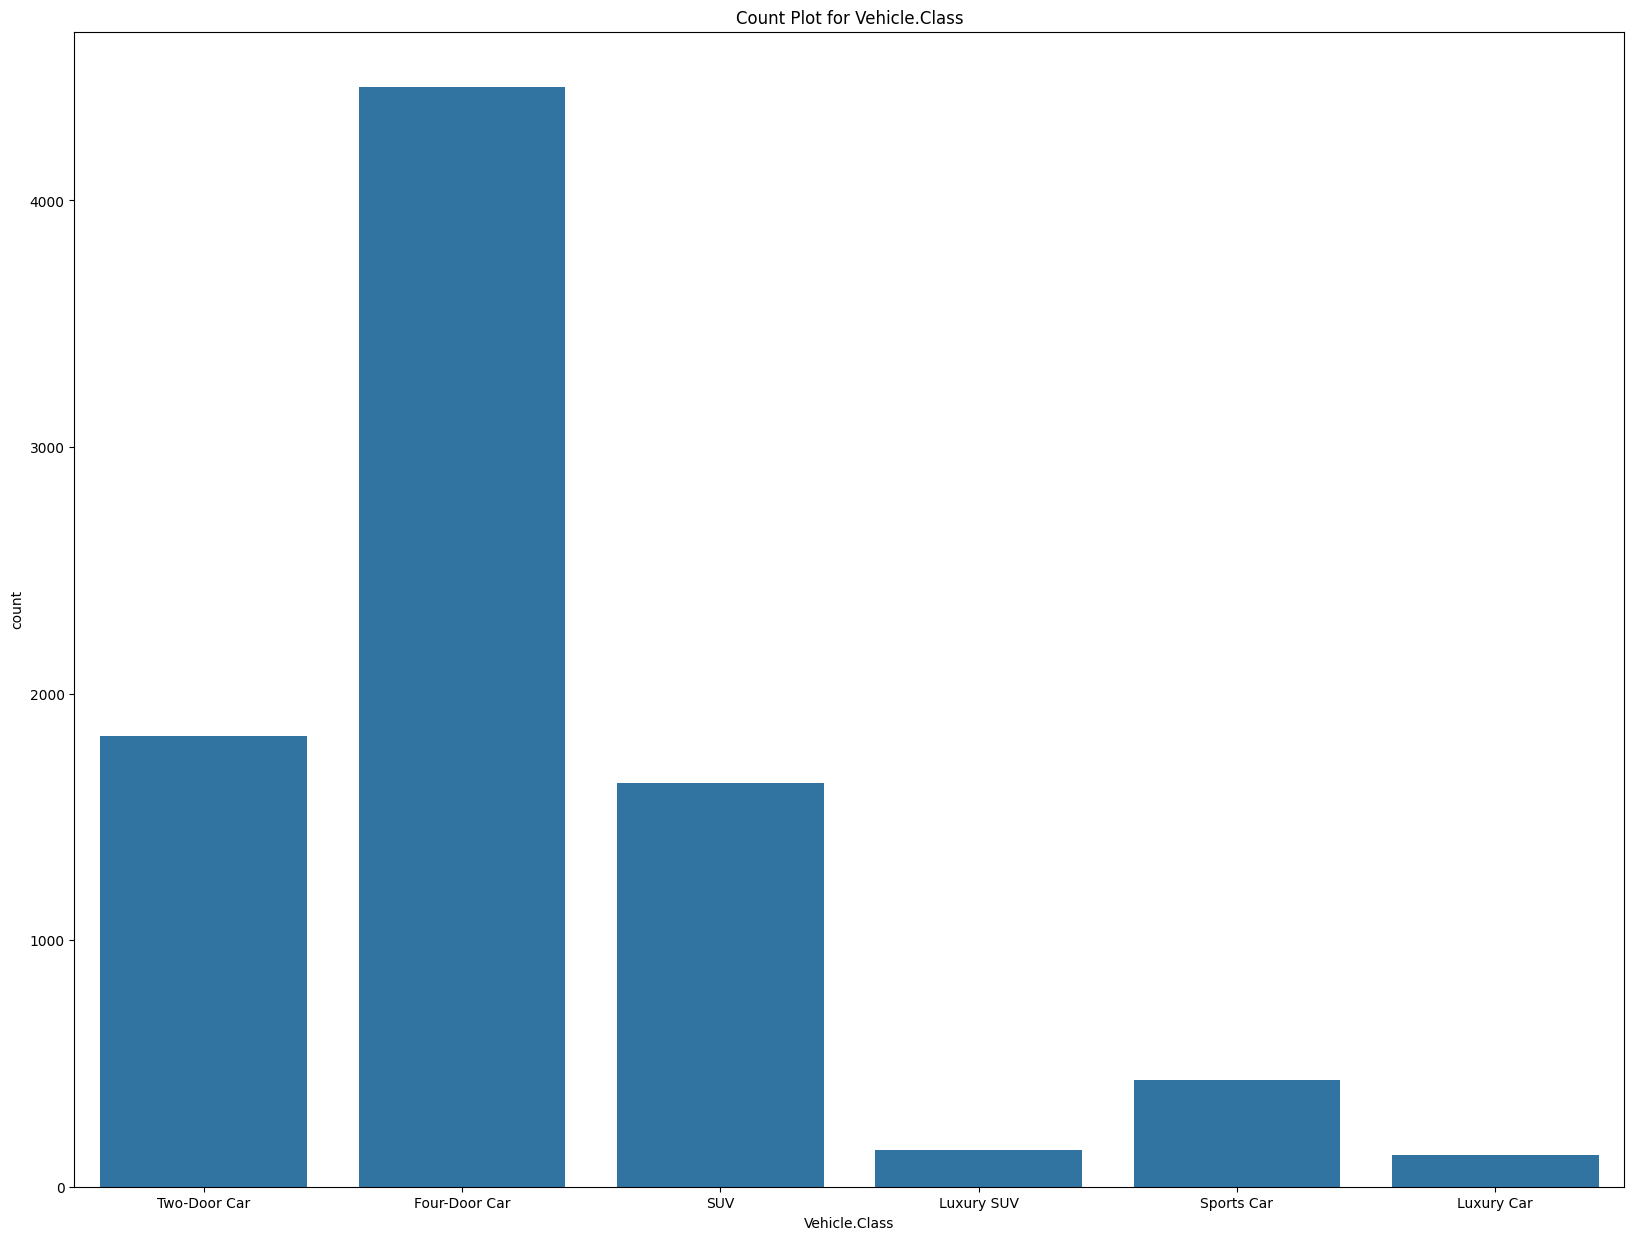

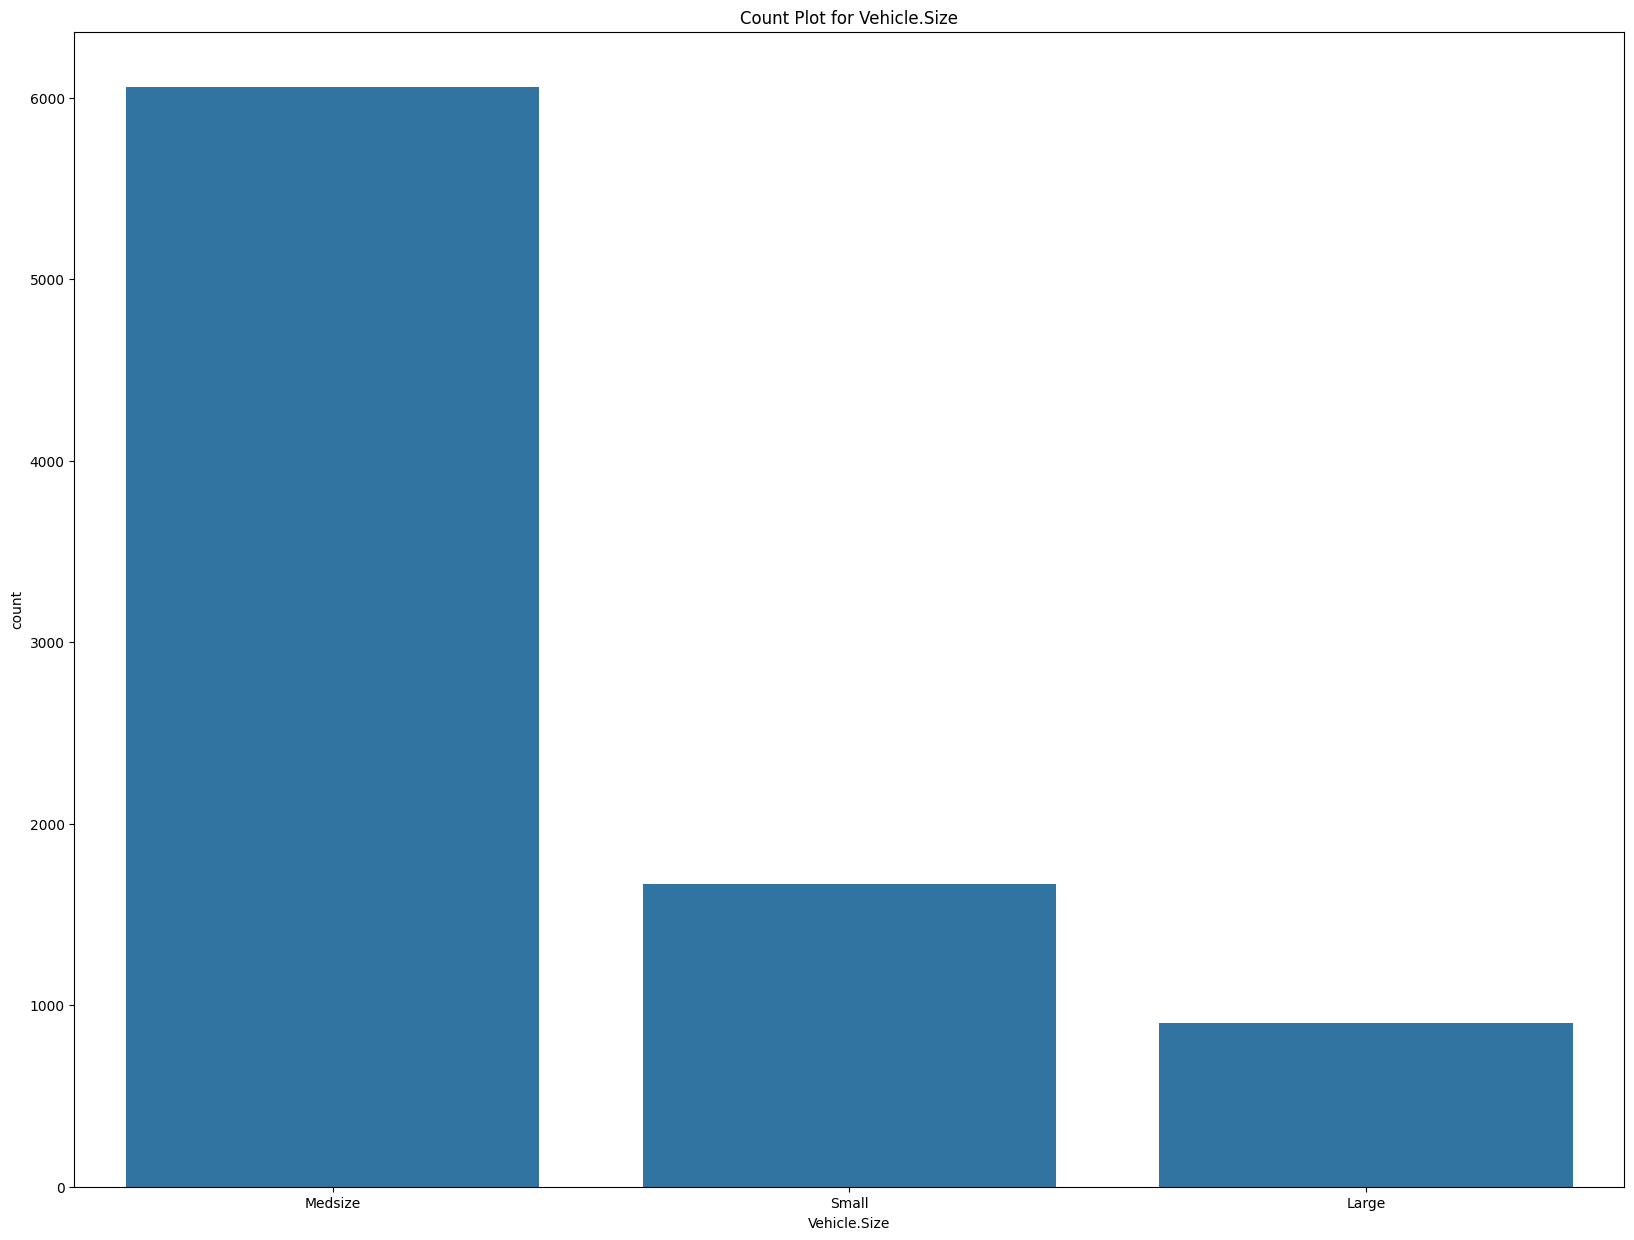

In [10]:
# Plot histograms of counts for unique values than are less than 10
for column in vehicle_insurance_data.columns:
    unique_values = vehicle_insurance_data[column].unique()
    if len(unique_values) <= 10:
        plt.figure(figsize=(20, 15))
        sns.countplot(x=column, data=vehicle_insurance_data)
        plt.title(f'Count Plot for {column}')
        plt.show()

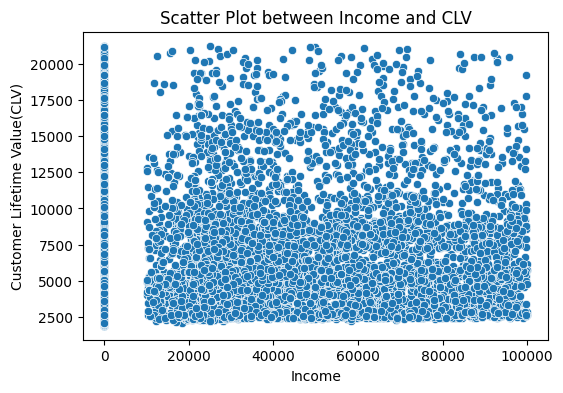

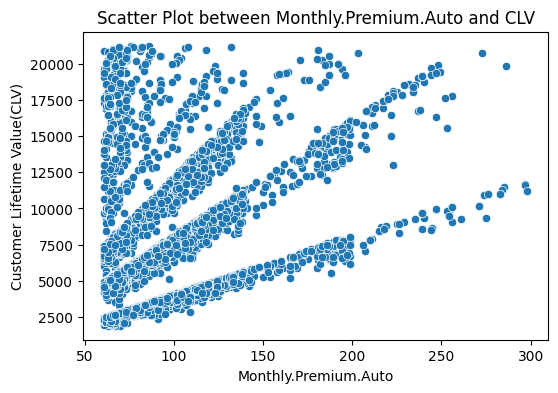

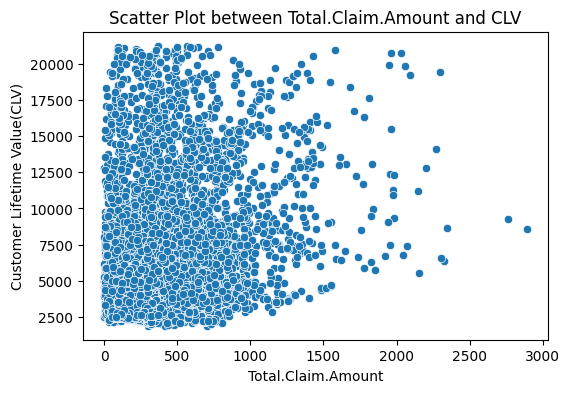

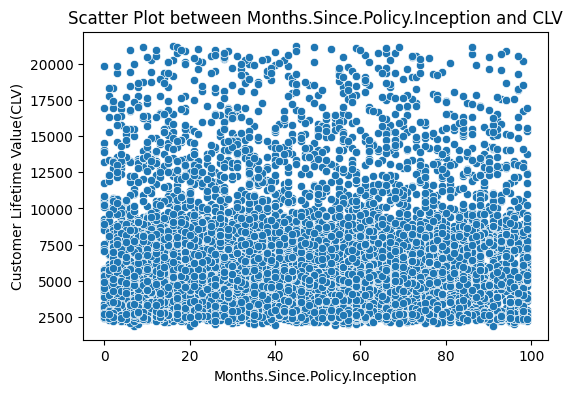

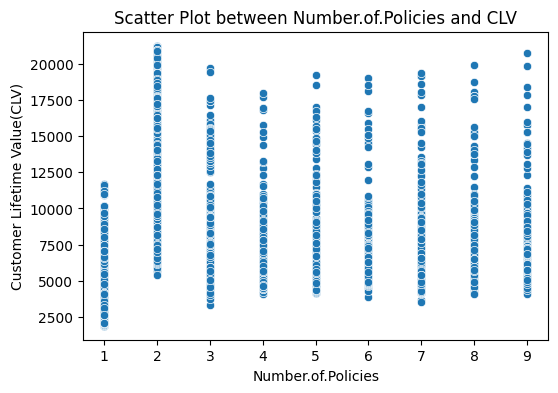

In [11]:
# Plot scatter plots between some features and CLV
features = ['Income', 'Monthly.Premium.Auto', 'Total.Claim.Amount', 'Months.Since.Policy.Inception', 'Number.of.Policies']

for feature in features:
  plt.figure(figsize=(6,4))
  sns.scatterplot(data= vehicle_insurance_data, x=vehicle_insurance_data[feature], y=vehicle_insurance_data['clv'])
  plt.title(f'Scatter Plot between {feature} and CLV')
  plt.xlabel(feature)
  plt.ylabel('Customer Lifetime Value(CLV)')
  plt.show()

In [12]:
# Drop unamed colum
vehicle_insurance_data = vehicle_insurance_data.drop(columns=['Unnamed: 0'])

In [13]:
vehicle_insurance_data.head()

,clv,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,...,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
# Encode categoricals

# Ordinal Encoding for ordinal columns
from sklearn.preprocessing import OrdinalEncoder


# Define order categories
categories = [
    ['Basic', 'Extended', 'Premium'], # Coverage
    ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'], # Education
    ['Personal L1', 'Personal L2', 'Personal L3', 'Corporate L1', 'Corporate L2', 'Corporate L3', 'Special L1', 'Special L2', 'Special L3'], # Policy
    ['Small', 'Medsize', 'Large'] # Vehicle size
]

ordinal_encoder = OrdinalEncoder(categories=categories)
ordinal_columns = ['Coverage' ,'Education', 'Policy', 'Vehicle.Size']
vehicle_insurance_data[ordinal_columns] = ordinal_encoder.fit_transform(vehicle_insurance_data[ordinal_columns])


In [15]:
# One-Hot Encoding for nominal columns
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)
onehot_columns = ['Response', 'EmploymentStatus','Gender', 'Location.Code', 'Marital.Status','Policy.Type', 'Renew.Offer.Type', 'Sales.Channel', 'Vehicle.Class']

encoded_columns = onehot_encoder.fit_transform(vehicle_insurance_data[onehot_columns])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=onehot_encoder.get_feature_names_out())
vehicle_insurance_data = pd.concat([vehicle_insurance_data, encoded_columns_df], axis=1)
vehicle_insurance_data.drop(columns=onehot_columns, inplace=True)

In [16]:
# Preview dataset head after encoding
vehicle_insurance_data.head()

,clv,Coverage,Education,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy,...,Renew.Offer.Type_Offer3,Renew.Offer.Type_Offer4,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car
0,2763.519279,0.0,2.0,56274,69,32,5,0,1,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6979.535903,1.0,2.0,0,94,13,42,0,8,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12887.431650,2.0,2.0,48767,108,18,38,0,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7645.861827,0.0,2.0,0,106,18,65,0,7,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2813.692575,0.0,2.0,43836,73,12,44,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


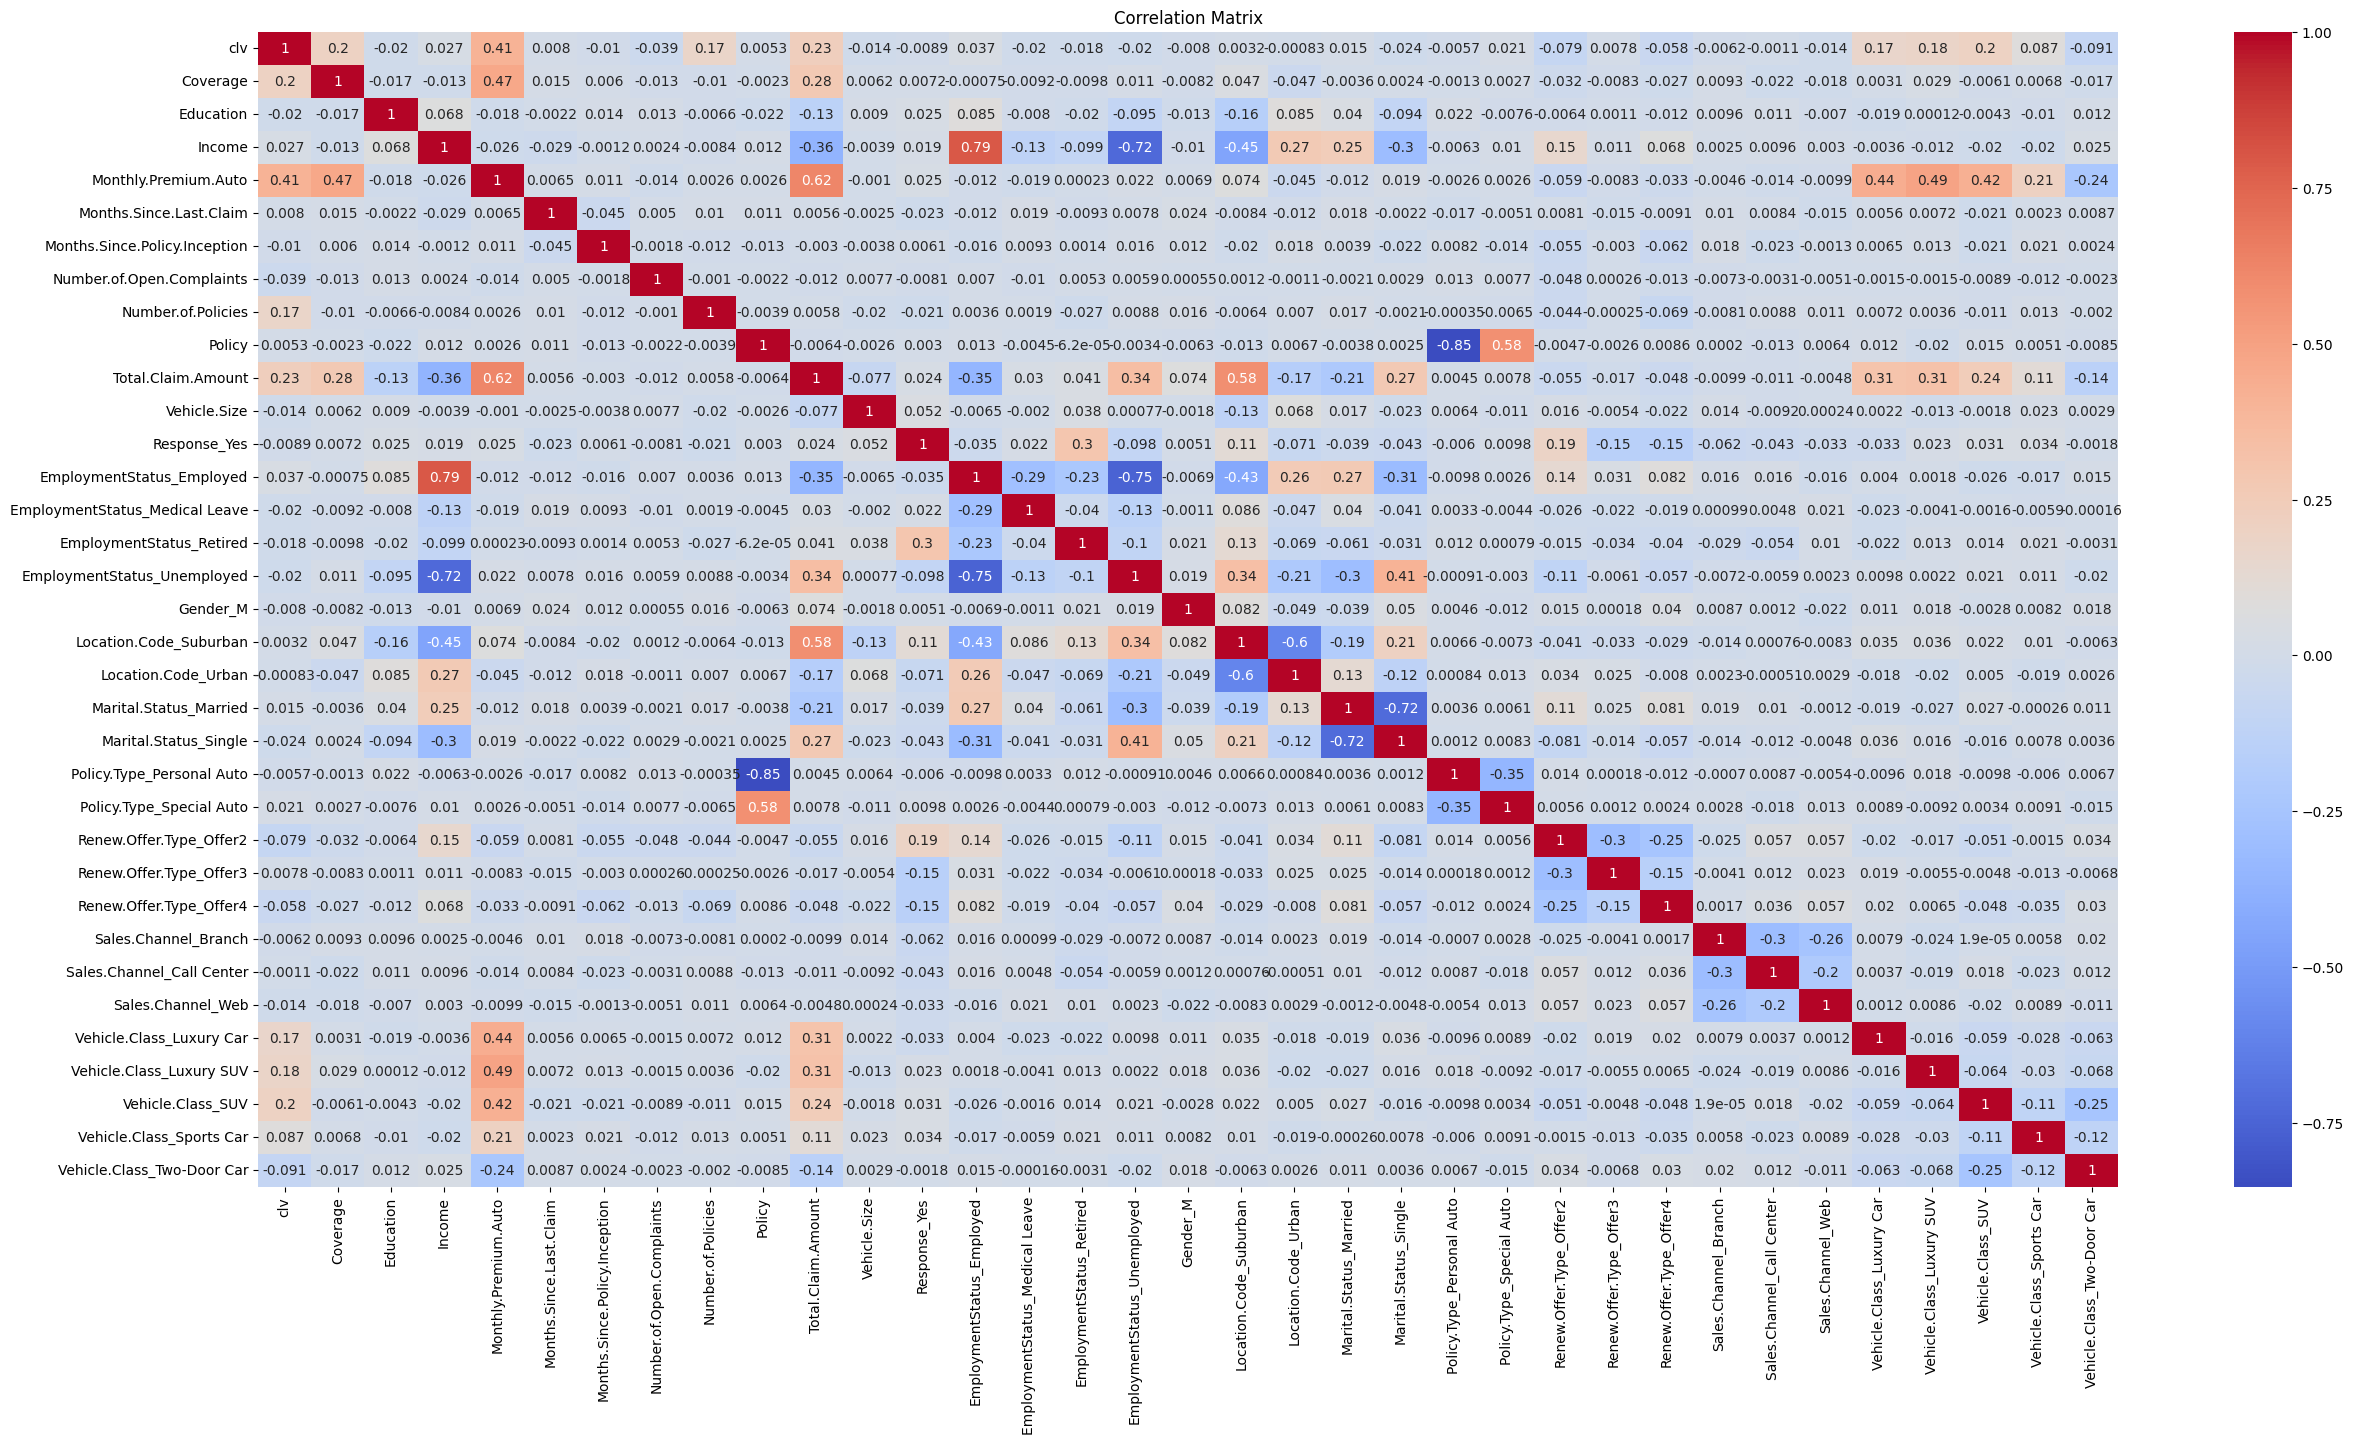

In [17]:
# Correlation matrix
correlation_matrix = vehicle_insurance_data.corr()

plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

Features Engineered to Boost Predictive Power:

- Claims Ratio: Helps detect riskier customers by identifying those with a high number of open claims.

- Loyalty Score: Calculates customer loyalty based on policy inception date and the number of policies a customer holds with the insurance company.

- (FEATURE UNDER REVISION)Complaint Ratio: Measures the relationship between the number of open complaints and the time since policy inception. Frequent complaints may indicate a lower CLV.

In [18]:
# Claims ratio
claim_ratio = vehicle_insurance_data['Number.of.Open.Complaints'] / vehicle_insurance_data['Monthly.Premium.Auto']

vehicle_insurance_data['Claims.Ratio'] = claim_ratio

In [19]:
# Loyalty score
loyalty_score = vehicle_insurance_data['Months.Since.Policy.Inception'] / vehicle_insurance_data['Number.of.Policies']

vehicle_insurance_data['Loyalty.Score'] = loyalty_score

In [36]:
# # Complaint ratio
# complaint_ratio = vehicle_insurance_data['Number.of.Open.Complaints'] / vehicle_insurance_data['Months.Since.Policy.Inception']

# vehicle_insurance_data['Complaint.Ratio'] = complaint_ratio

In [20]:
vehicle_insurance_data.head()

,clv,Coverage,Education,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy,...,Sales.Channel_Branch,Sales.Channel_Call Center,Sales.Channel_Web,Vehicle.Class_Luxury Car,Vehicle.Class_Luxury SUV,Vehicle.Class_SUV,Vehicle.Class_Sports Car,Vehicle.Class_Two-Door Car,Claims.Ratio,Loyalty.Score
0,2763.519279,0.0,2.0,56274,69,32,5,0,1,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.000000
1,6979.535903,1.0,2.0,0,94,13,42,0,8,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.250000
2,12887.431650,2.0,2.0,48767,108,18,38,0,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.000000
3,7645.861827,0.0,2.0,0,106,18,65,0,7,4.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.285714
4,2813.692575,0.0,2.0,43836,73,12,44,0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.000000


In [21]:
vehicle_insurance_data.dtypes

,0
clv,float64
Coverage,float64
Education,float64
Income,int64
Monthly.Premium.Auto,int64
Months.Since.Last.Claim,int64
Months.Since.Policy.Inception,int64
Number.of.Open.Complaints,int64
Number.of.Policies,int64
Policy,float64


In [22]:
vehicle_insurance_data.isnull().sum()

,0
clv,0
Coverage,0
Education,0
Income,0
Monthly.Premium.Auto,0
Months.Since.Last.Claim,0
Months.Since.Policy.Inception,0
Number.of.Open.Complaints,0
Number.of.Policies,0
Policy,0


## Data Preparation

In [23]:
# Drop unecessary columns for data preparation if necessary


In [24]:
# Split the data
from sklearn.model_selection import train_test_split

X = vehicle_insurance_data.drop(columns=['clv'])
y = vehicle_insurance_data['clv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(6904, 36)

In [26]:
X_test.shape

(1726, 36)

## Machine Learning Model

Current solutions for predicting Customer Lifetime Value (CLV) are suboptimal. Formula-based approaches struggle to capture nuanced relationships between features, and while traditional regression models offer slight improvements, they are limited to linear relationships.




For example:

- Rule-based segmentation results in a 30-50% error rate because it oversimplifies customer behavior.

- CLV formula-based approaches produce a 20-40% error rate due to the assumption that all market segments behave the same.

- Traditional regression models have a 15-30% error rate because they fail to capture nonlinear relationships that influence CLV.

However, ensemble methods such as Gradient Boosting achieve significantly lower error rates, ranging from 5-15%. This is because they:

- Capture complex, nonlinear patterns
- Automatically detect feature interactions
- Adapt to evolving customer behavior over time

To address this, the project will first establish a baseline multivariate model using a traditional supervised regression approach (Linear Regression) with batch learning. This baseline will then be compared against ensemble methods, specifically Gradient Boosting algorithms such as XGBoost, to evaluate performance improvements.

In [27]:
# Baseline Model- Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [28]:
# Score
lin_reg_score = lin_reg_model.score(X_test, y_test)
print(f"Model Accuracy: {lin_reg_score:.4f}")

Model Accuracy: 0.4005


For the Gradient Boosting models, two different implementations will be tested to compare performance within Gradient Boosting machine learning algorithms.

Why Gradient Boosting from Scikit-Learn?
- Gradient Boosting is a general machine learning algorithm that improves predictions by sequentially combining weak learners.

Why XGBoost?
- XGBoost is an open-source, highly optimized, and efficient version of Gradient Boosting, known for its speed and performance.

In [29]:
# Model - Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

# Gradient Boosting Model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

GradientBoostingRegressor()

In [30]:
# Score
gb_score = gb_model.score(X_test, y_test)
print(f"Model Accuracy: {gb_score:.4f}")

Model Accuracy: 0.8509


In [31]:
# XGB Gradient Boosting Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
# Score
xgb_score = xgb_model.score(X_test, y_test)
print(f"Model Accuracy: {xgb_score:.4f}")

Model Accuracy: 0.8310


In [33]:
# Metrics
from sklearn.metrics import root_mean_squared_error as RMSE,mean_absolute_error as MAE

In [34]:
# Baseline model performance metrics
lin_reg_rmse = RMSE(y_test, lin_reg_model.predict(X_test))
lin_reg_mae = MAE(y_test, lin_reg_model.predict(X_test))

print(f"Linear Regression RMSE: {lin_reg_rmse:.4f}")
print(f"Linear Regression MAE: {lin_reg_mae:.4f}")

Linear Regression RMSE: 3053.9873
Linear Regression MAE: 2144.5392


In [35]:
# Gradient Boosting performance metrics
gb_rmse = RMSE(y_test, gb_model.predict(X_test))
gb_mae = MAE(y_test, gb_model.predict(X_test))

print(f"Gradient Boosting RMSE: {gb_rmse:.4f}")
print(f"Gradient Boosting MAE: {gb_mae:.4f}")

Gradient Boosting RMSE: 1523.0339
Gradient Boosting MAE: 664.3749


In [36]:
# XGBoost perfromance metrics
xgb_rmse = RMSE(y_test, xgb_model.predict(X_test))
xgb_mae = MAE(y_test, xgb_model.predict(X_test))

print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost MAE: {xgb_mae:.4f}")

XGBoost RMSE: 1621.3199
XGBoost MAE: 740.1555


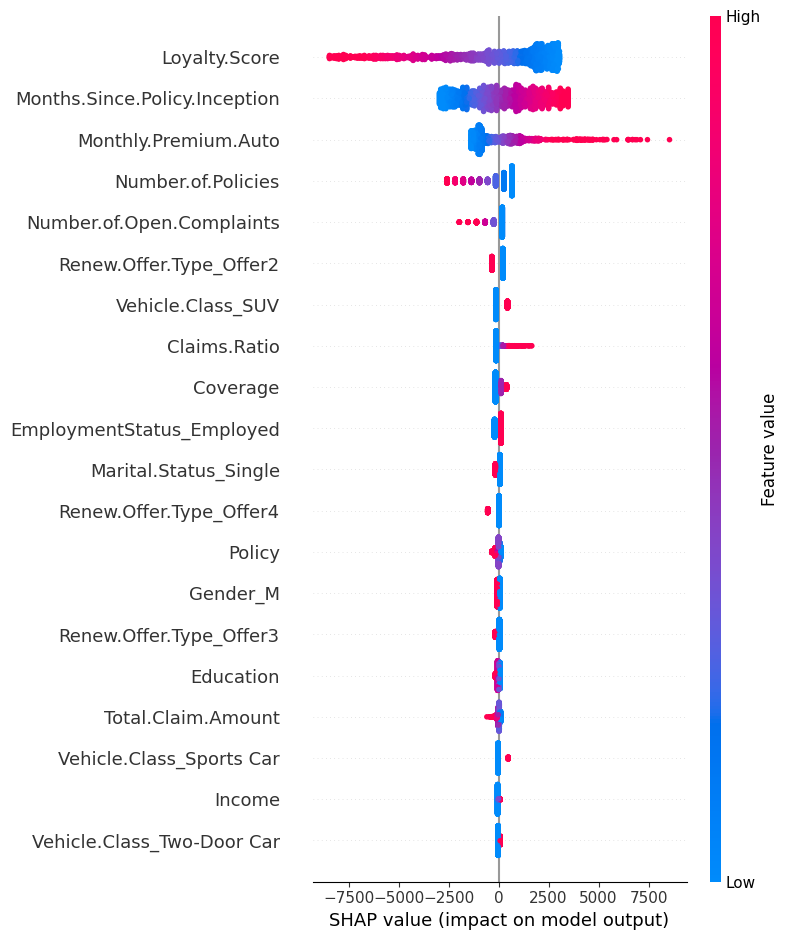

In [42]:
# Evaluate with SHAP
import shap

# Linear model
explainer = shap.Explainer(lin_reg_model, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

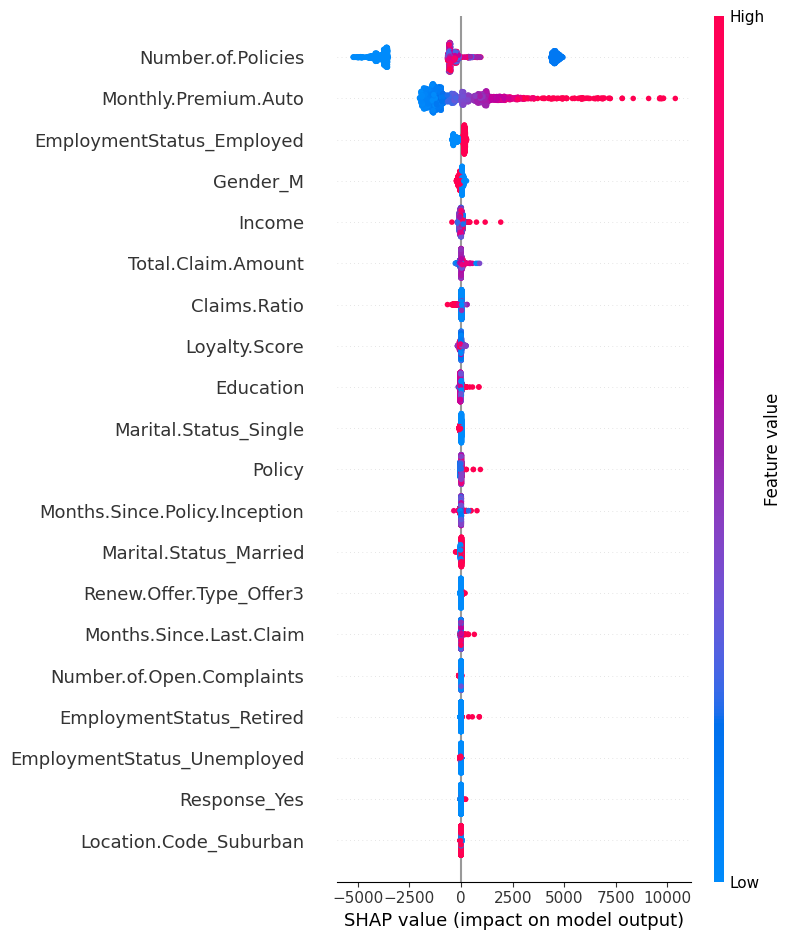

In [44]:
# Sklearn Gradient Boosting
gb_explainer = shap.Explainer(gb_model, X_train)
shap_values = gb_explainer.shap_values(X_test)

summary_plot = shap.summary_plot(shap_values, X_test)

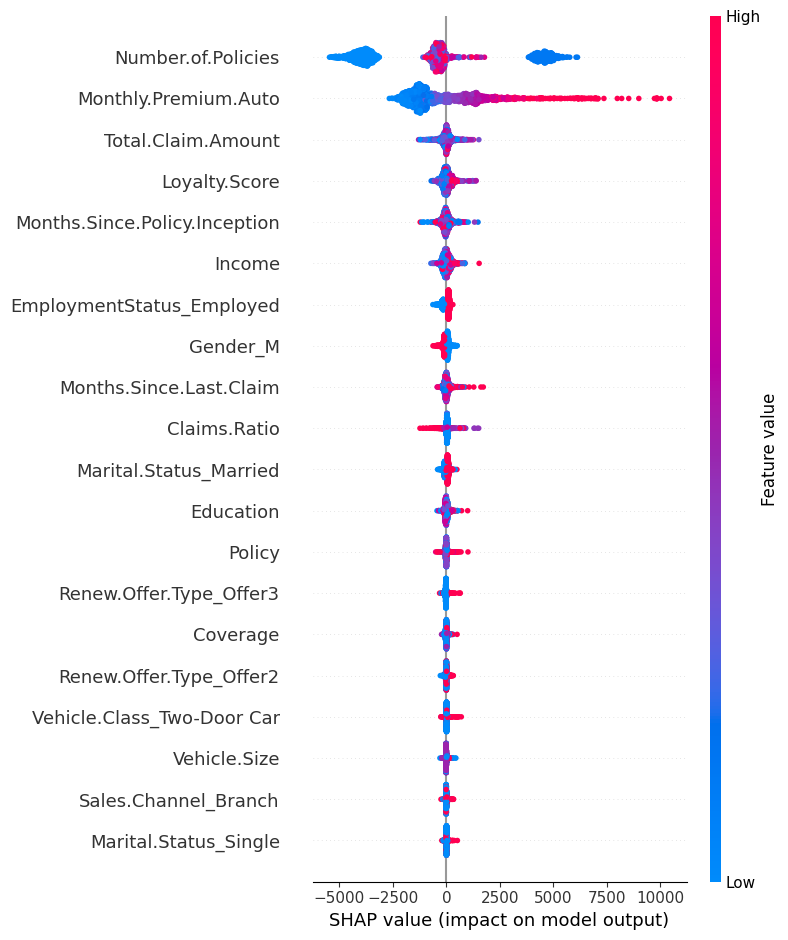

In [47]:
# XGBoost
xgb_explainer = shap.Explainer(xgb_model, X_train)
shap_values = xgb_explainer.shap_values(X_test)

summary_plot = shap.summary_plot(shap_values, X_test)